# Importing libraries

In [1]:
!pip install factor_analyzer
!pip install ruptures
!pip install numpy scikit-learn pyod
!pip install mrmr_selection

  Using cached factor_analyzer-0.5.1.tar.gz (42 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42624 sha256=62bebb9933679bc38ffa09788999e874af560b9e5a647663b75d14436b28a048
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
#Importing Data and Exploratory Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from scipy.stats import chi2

#Pre-Processing
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
import ruptures as rpt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import f
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from mrmr import mrmr_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from pyod.models.pca import PCA as RobustPCA

Collecting data from this dataset: https://www.kaggle.com/datasets/d4rklucif3r/full-scale-waste-water-treatment-plant-data/code

In [4]:
df = pd.read_csv(r'C:\Users\User\Wastewater-Treatment-Sector-Dataset\Data-Melbourne_F.csv')
df.head()

avg_outflow  avg_inflow  total_grid    Am    BOD     COD      TN     T  \
0        2.941       2.589      175856  27.0  365.0   730.0  60.378  19.3   
1        2.936       2.961      181624  25.0  370.0   740.0  60.026  17.1   
2        2.928       3.225      202016  42.0  418.0   836.0  64.522  16.8   
3        2.928       3.354      207547  36.0  430.0   850.0  63.000  14.6   
4        2.917       3.794      202824  46.0  508.0  1016.0  65.590  13.4   

     TM    Tm  SLP   H    PP    VV     V    VM    VG  year  month  day  
0  25.1  12.6  0.0  56  1.52  10.0  26.9  53.5  79.5  2014      1    1  
1  23.6  12.3  0.0  63  0.00  10.0  14.4  27.8   0.0  2014      1    2  
2  27.2   8.8  0.0  47  0.25  10.0  31.9  61.1  77.8  2014      1    5  
3  19.9  11.1  0.0  49  0.00  10.0  27.0  38.9  53.5  2014      1    6  
4  19.1   8.0  0.0  65  0.00  10.0  20.6  35.2  53.5  2014      1    7

In [5]:
df.drop('VG', axis=1) # I'm dropping this feature because it is not described in the article 
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.set_index('date', inplace=True)
df.drop(columns=['year', 'month', 'day'], inplace=True)

In [6]:
df.head()

avg_outflow  avg_inflow  total_grid    Am    BOD     COD      TN  \
date                                                                           
2014-01-01        2.941       2.589      175856  27.0  365.0   730.0  60.378   
2014-01-02        2.936       2.961      181624  25.0  370.0   740.0  60.026   
2014-01-05        2.928       3.225      202016  42.0  418.0   836.0  64.522   
2014-01-06        2.928       3.354      207547  36.0  430.0   850.0  63.000   
2014-01-07        2.917       3.794      202824  46.0  508.0  1016.0  65.590   

               T    TM    Tm  SLP   H    PP    VV     V    VM    VG  
date                                                                 
2014-01-01  19.3  25.1  12.6  0.0  56  1.52  10.0  26.9  53.5  79.5  
2014-01-02  17.1  23.6  12.3  0.0  63  0.00  10.0  14.4  27.8   0.0  
2014-01-05  16.8  27.2   8.8  0.0  47  0.25  10.0  31.9  61.1  77.8  
2014-01-06  14.6  19.9  11.1  0.0  49  0.00  10.0  27.0  38.9  53.5  
2014-01-07  13.4  19.1   8.0  0.0  65  0.00  10.0  20.6  35.2  53.5

In [8]:
df.shape

(1382, 17)

In [9]:
fnts=12         # fontsize
fgs=(20/2, 6/2) # figure size
trs=0.6         # line transparency
plt.style.use("ggplot")

# First Exploratory Analysis

## Dataset Description

In [20]:
df.describe()

avg_outflow   avg_inflow     total_grid           Am          BOD  \
count  1382.000000  1382.000000    1382.000000  1382.000000  1382.000000   
mean      3.930608     4.506338  275159.089001    39.222302   382.061708   
std       1.228778     1.439583   44640.533689     7.761598    85.996012   
min       0.000004     2.589000  116638.000000    13.000000   140.000000   
25%       3.074500     3.643250  246435.750000    34.000000   330.000000   
50%       3.701000     4.161500  275808.000000    39.000000   360.000000   
75%       4.498750     4.847750  305703.750000    44.000000   422.980000   
max       7.920000    18.968000  398328.000000    93.000000   850.000000   

               COD           TN            T           TM           Tm  \
count  1382.000000  1382.000000  1382.000000  1382.000000  1382.000000   
mean    845.960434    62.740752    15.036686    20.530897    10.037337   
std     145.416540     3.571035     5.398491     7.096760     4.656887   
min     360.000000    40.000000     0.000000     0.000000    -2.000000   
25%     751.250000    61.396000    10.800000    15.000000     6.800000   
50%     845.000000    62.957500    14.300000    19.200000     9.600000   
75%     920.000000    64.366000    18.575000    25.200000    13.000000   
max    1700.000000    92.000000    35.500000    43.500000    28.500000   

               SLP            H           PP           VV            V  \
count  1382.000000  1382.000000  1382.000000  1382.000000  1382.000000   
mean      3.675036    63.558611     0.218090     9.101592    19.482706   
std      61.010416    14.534205     1.306923    16.322905     7.136868   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    55.000000     0.000000     8.400000    14.400000   
50%       0.000000    66.000000     0.000000    10.000000    18.100000   
75%       0.000000    74.000000     0.000000    10.000000    23.300000   
max    1022.000000    97.000000    18.030000   512.000000    49.100000   

                VM           VG  
count  1382.000000  1382.000000  
mean     35.381259    29.184009  
std      11.626362    31.366315  
min       0.000000     0.000000  
25%      27.800000     0.000000  
50%      33.500000     0.000000  
75%      42.400000    57.600000  
max      83.500000   107.600000

## Time series

In [10]:
#df dataframe
df_ea = df.copy()

#adjusting the dates on the plots
date_samples = df_ea.index[15::200]  # Starting on the 15th with a step of 200, this was chosen arbitrarily
sample_numbers = date_samples

*ASPl_names, = df_ea #for plotting the lines
df_ea['sample'] = df_ea.index #important to associate indexes with dates
df_ea = df_ea.reset_index(drop=True)

#selecting the indices in which the dates in the x-axis will be plotted
indices = [i for i, val in enumerate(df_ea['sample']) if val in sample_numbers]
tick_labels = [date.strftime('%d-%b-%y') for date in sample_numbers] #customizing the tick labels format

df_ea = df_ea.drop(columns='sample') #preparing the dataset for the plot

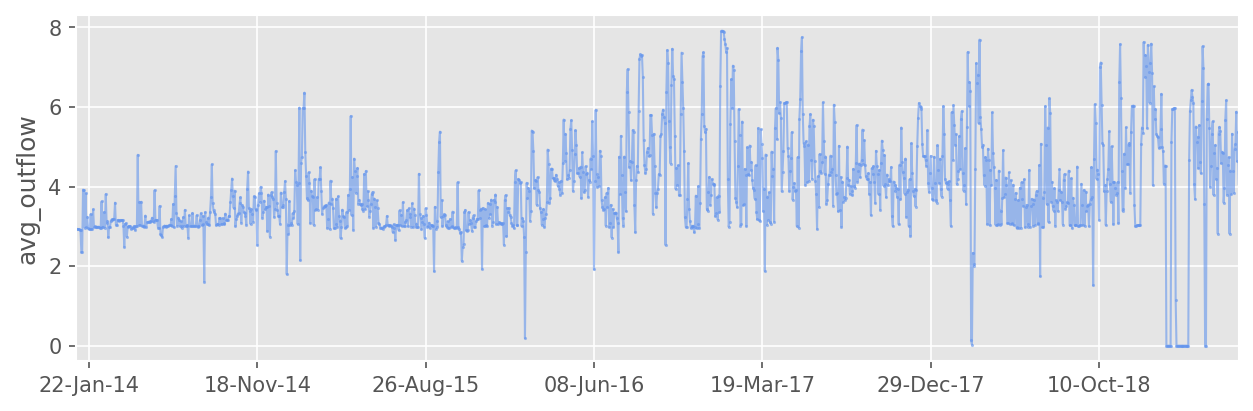

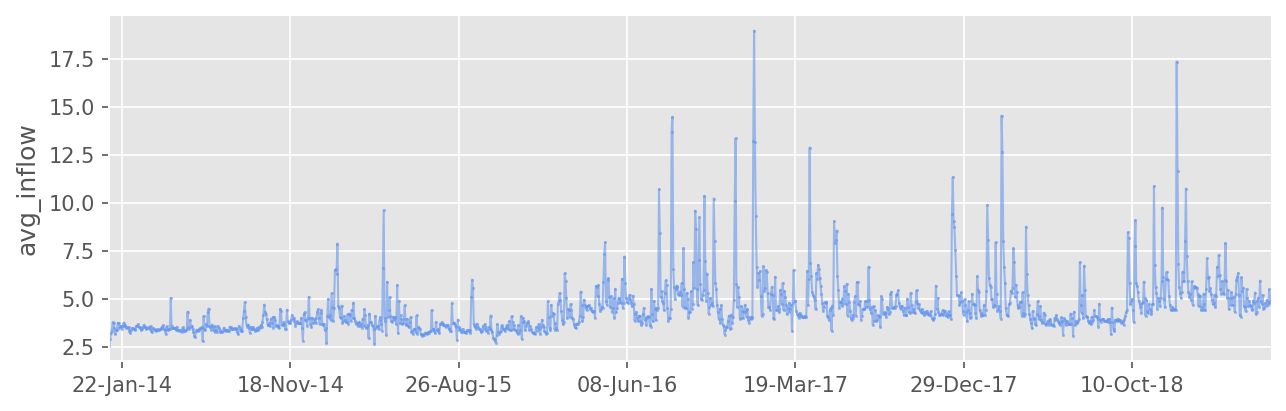

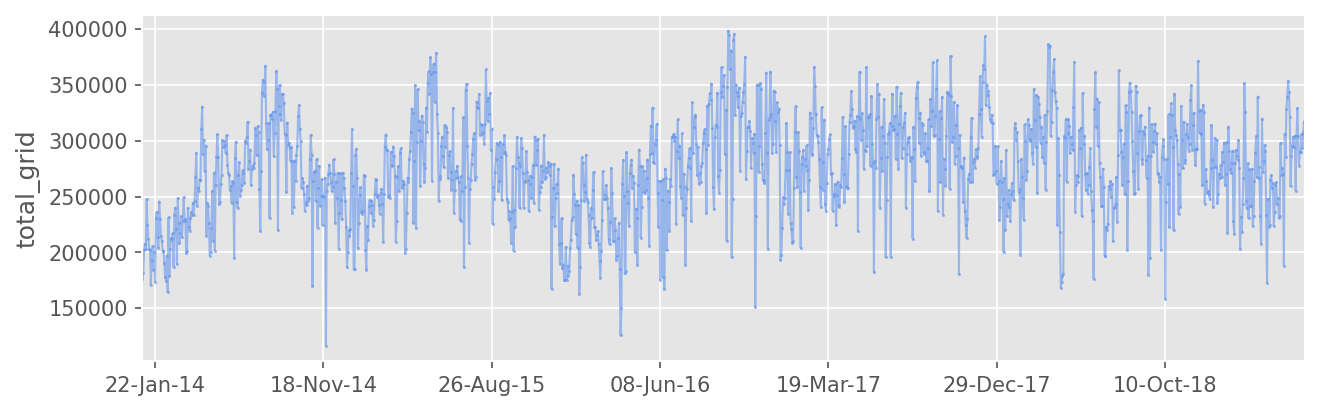

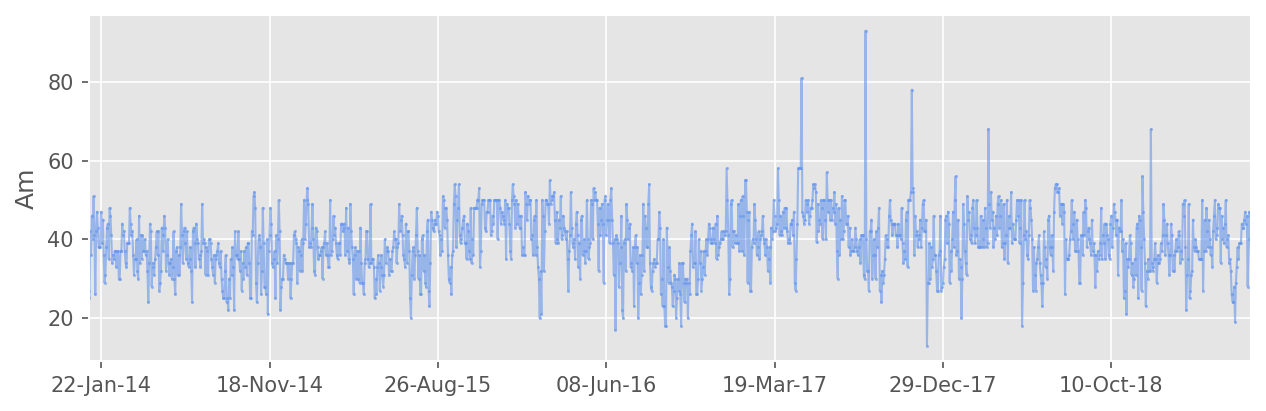

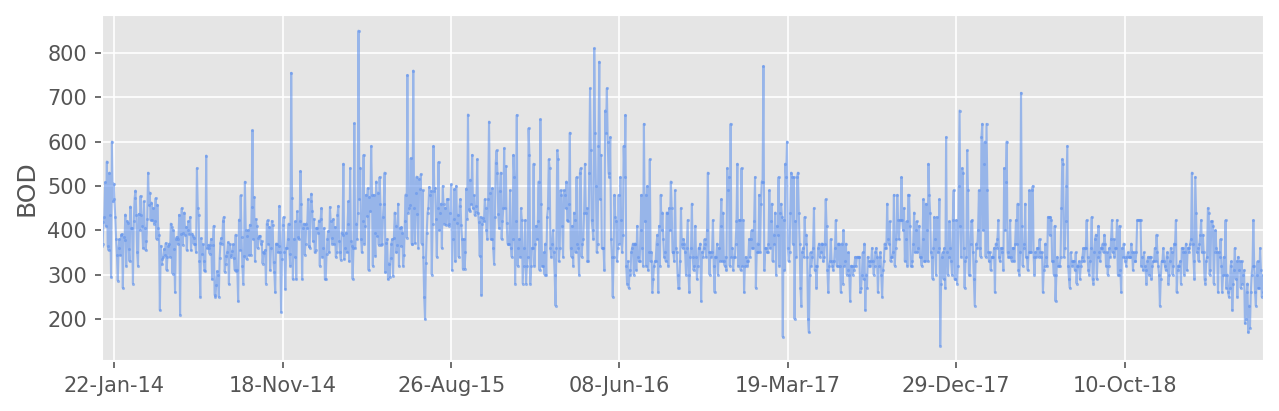

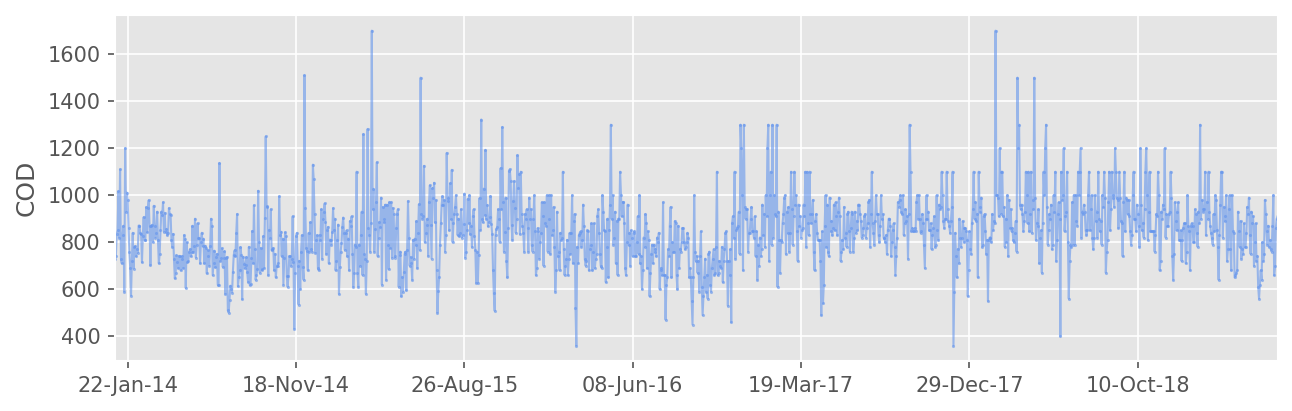

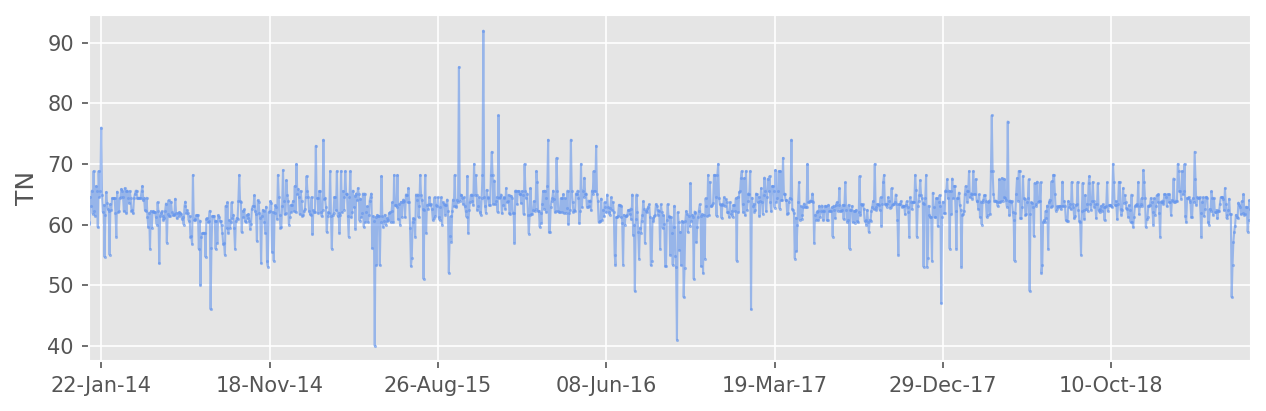

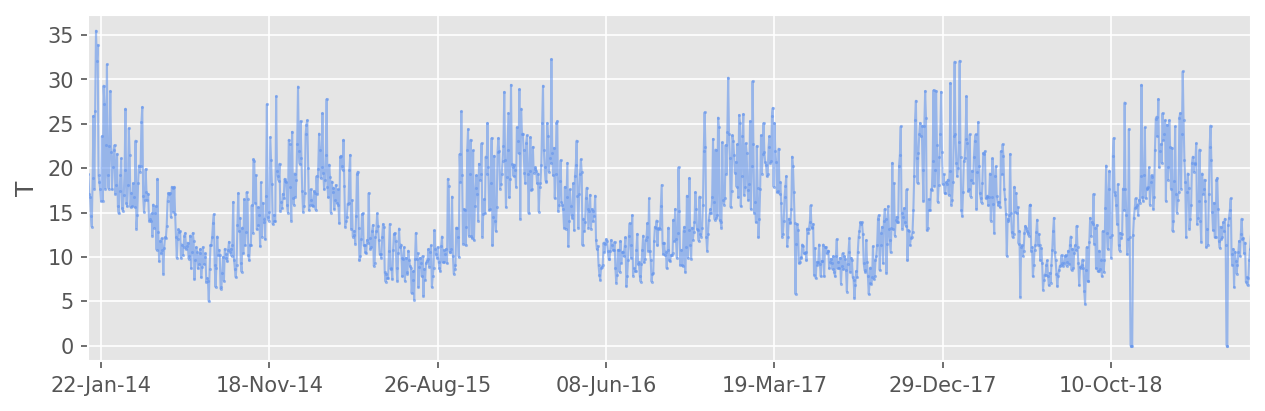

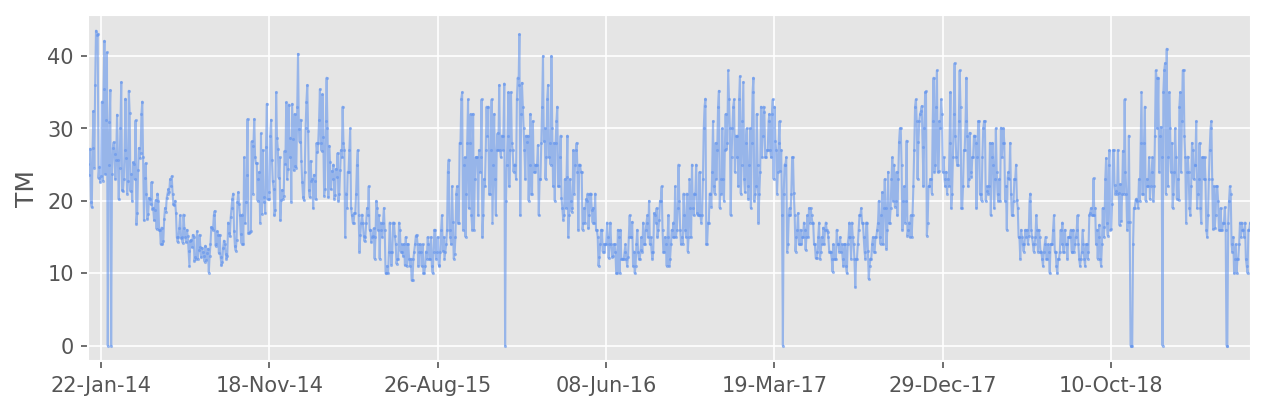

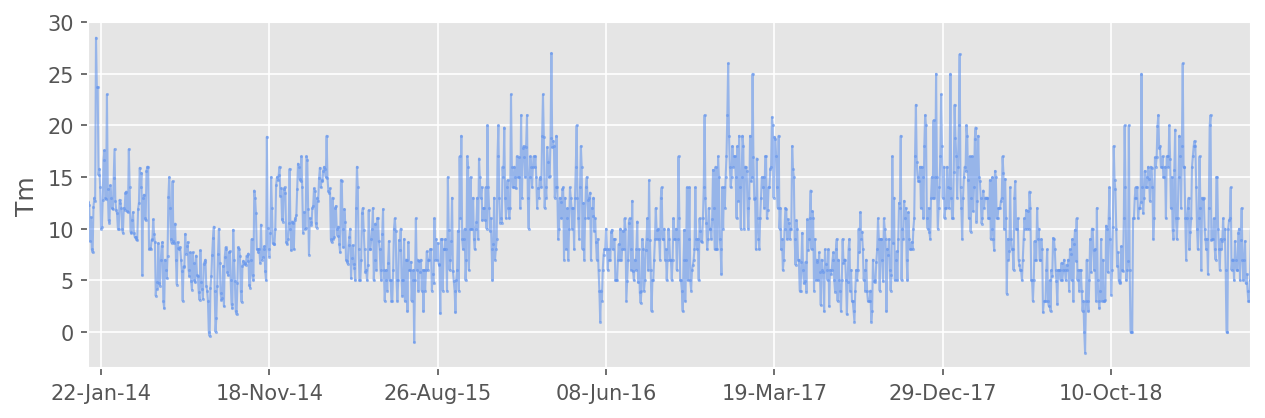

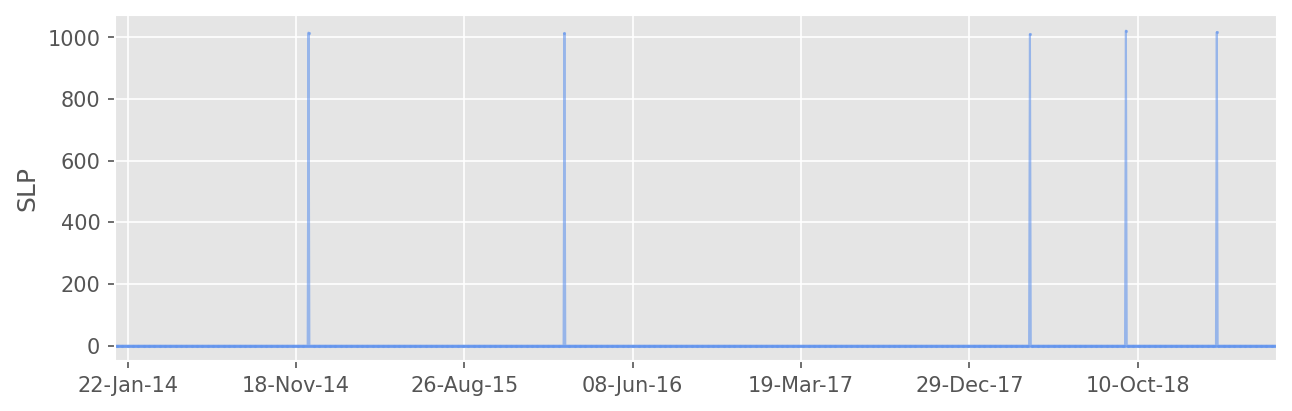

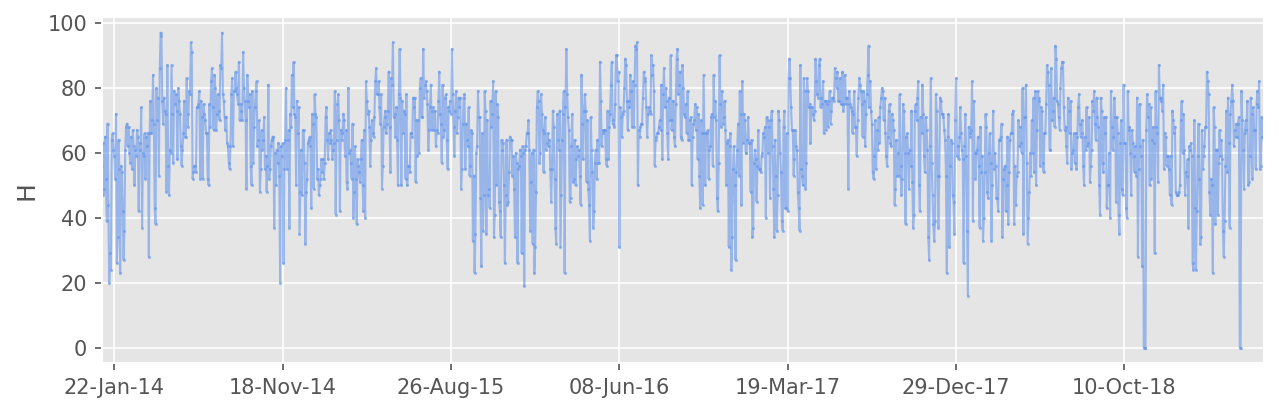

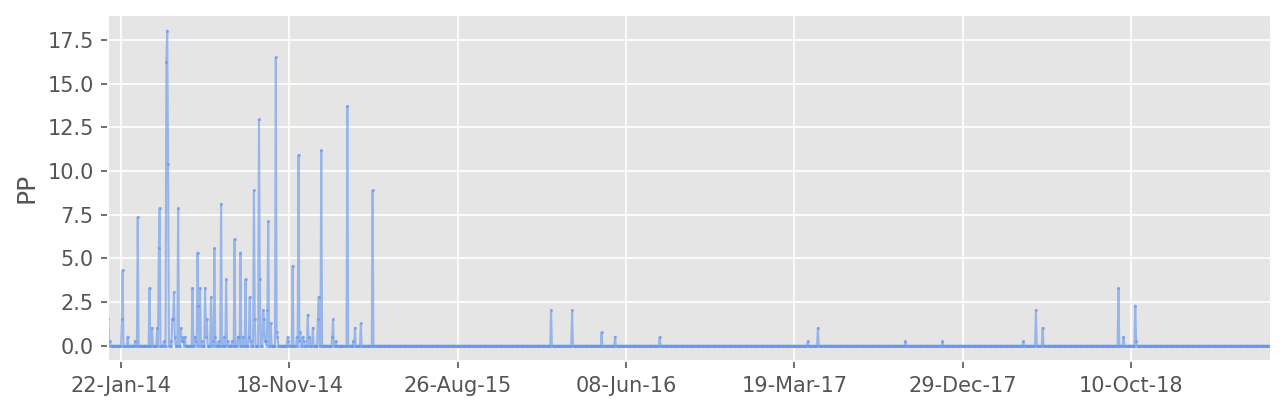

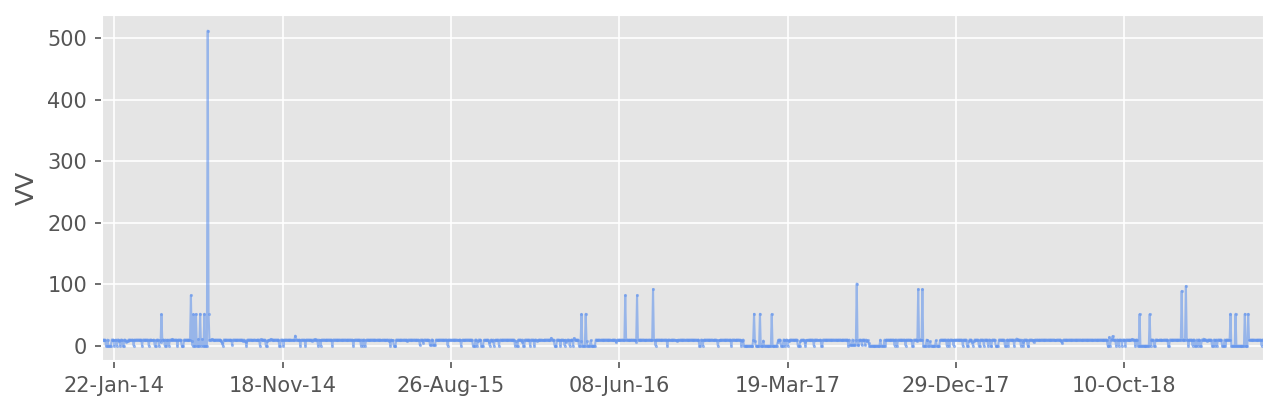

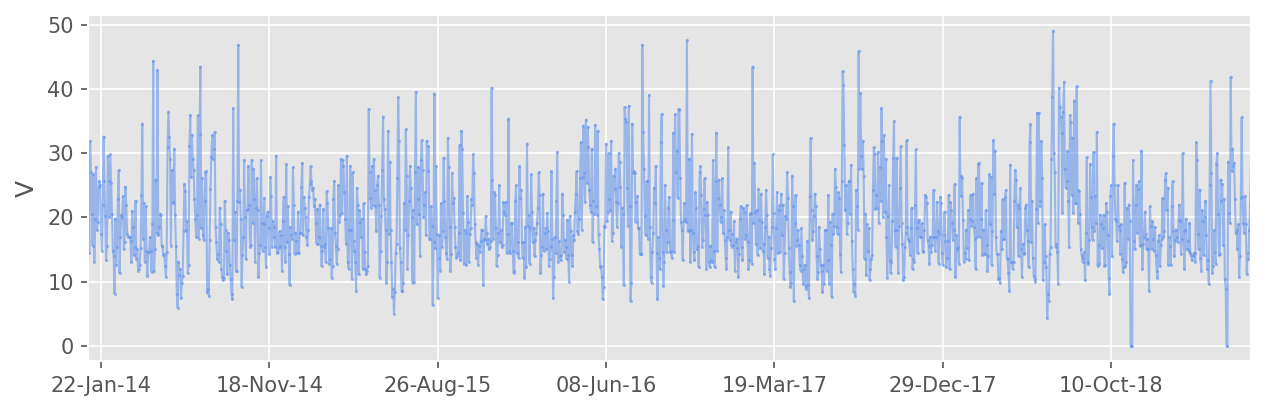

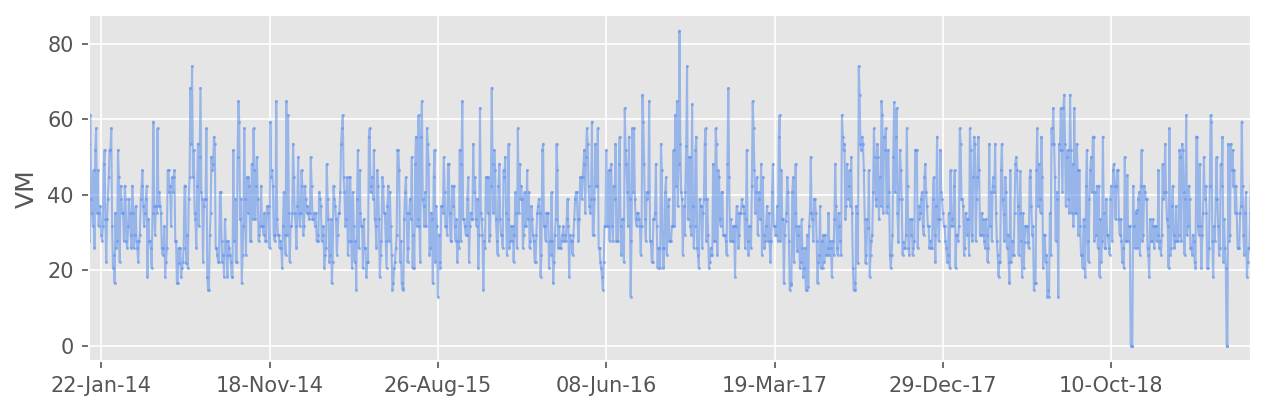

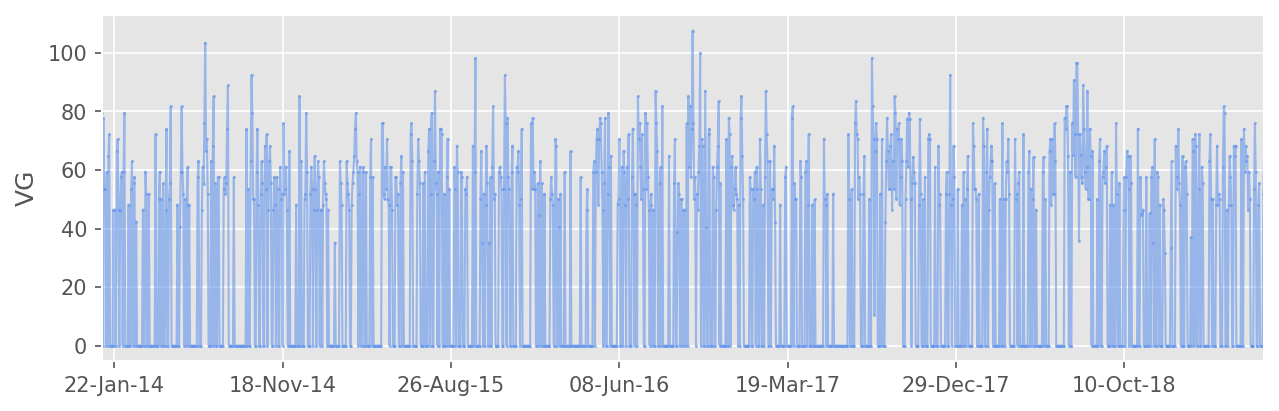

In [12]:
for i in range(0,len(df_ea.columns)):
  plt.figure(figsize=fgs, dpi=150)
  ax = df_ea[df_ea.columns[i]].plot(style="o-",markersize=1/2,linewidth=1,alpha=trs, color='cornflowerblue')
  ax.autoscale(enable=True, axis='x', tight=True)
  plt.ylabel(ASPl_names[i], fontsize=fnts, fontweight='normal')
  plt.tick_params(labelsize=10)
  plt.xticks(df_ea.index[15::200], labels=tick_labels)

  plt.show()

## Box plots

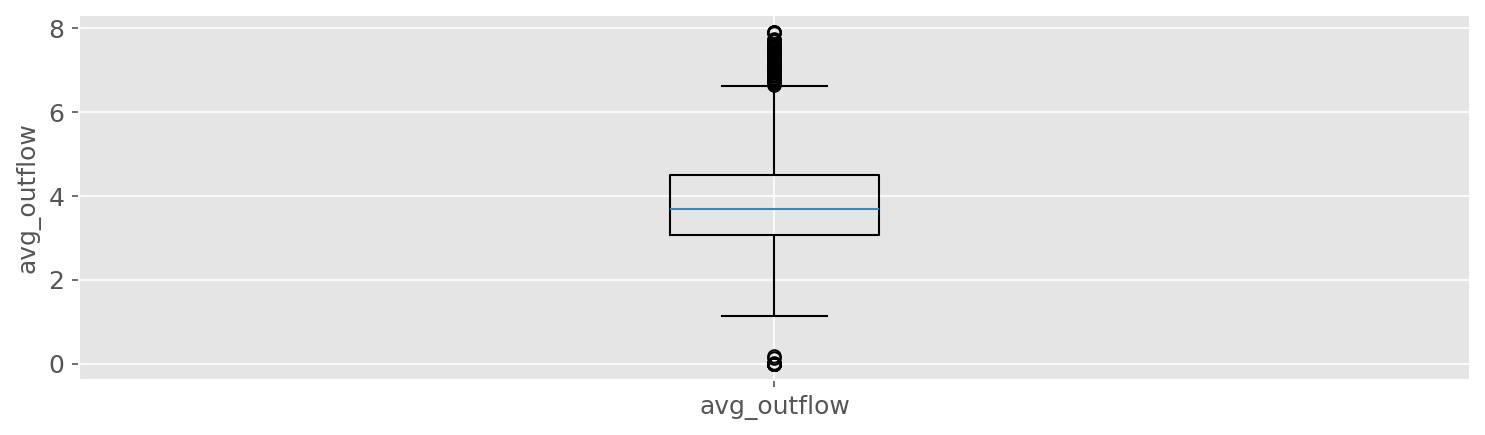

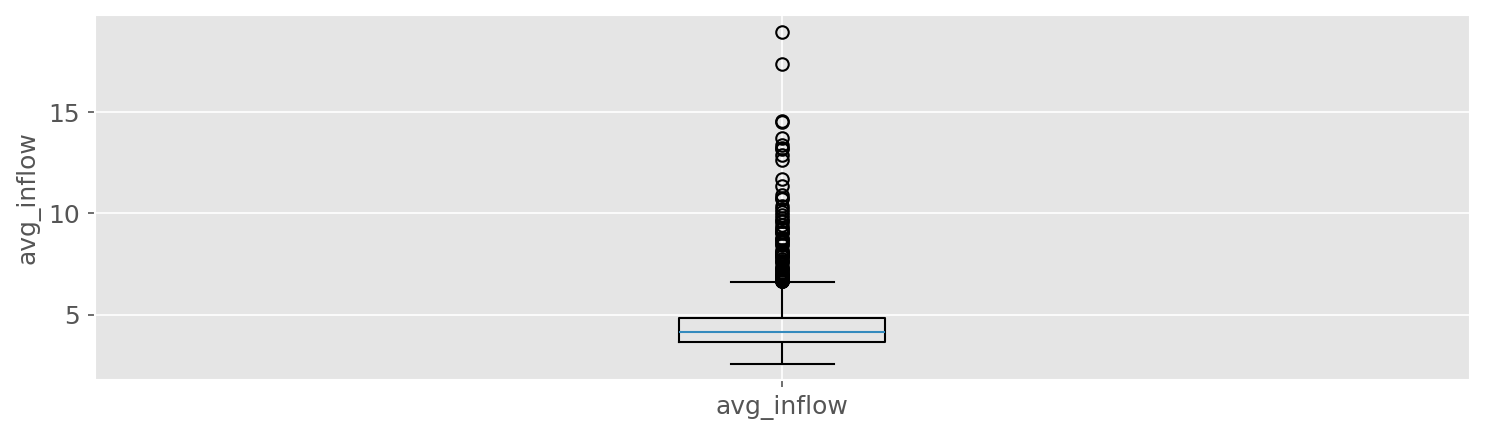

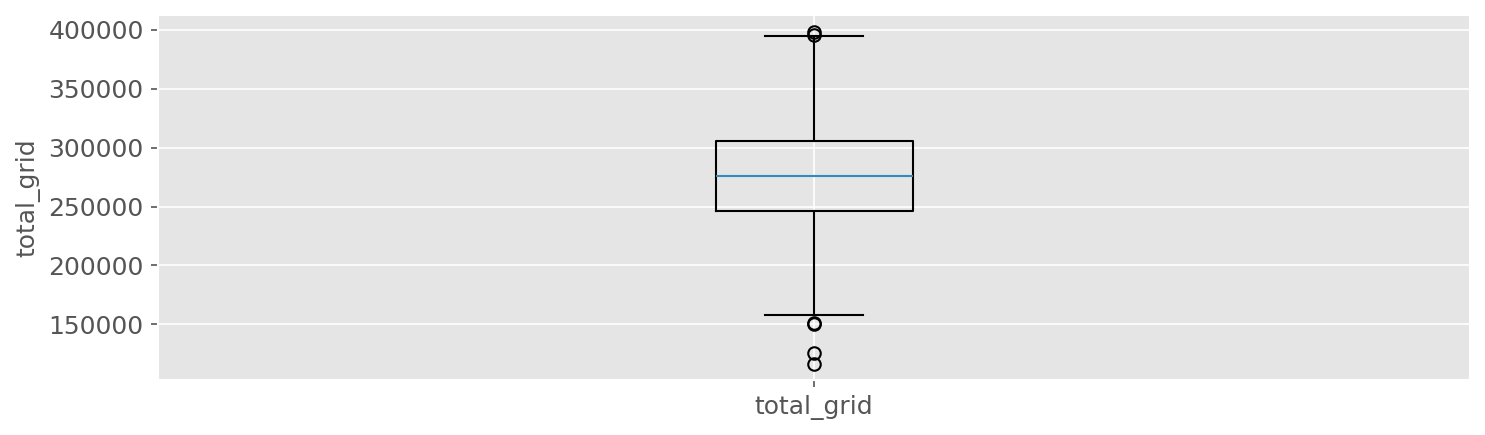

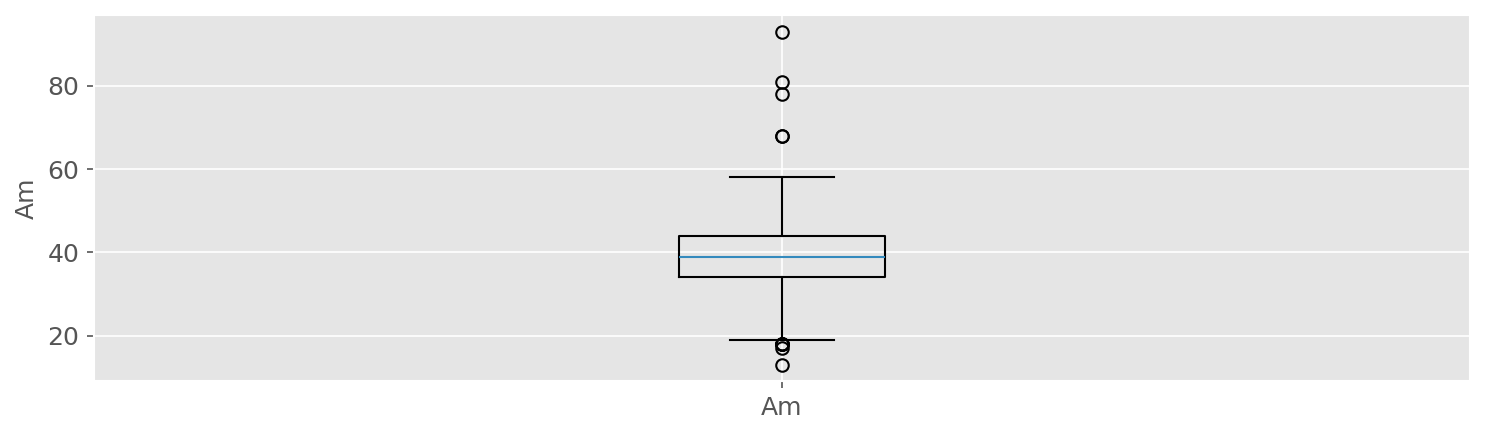

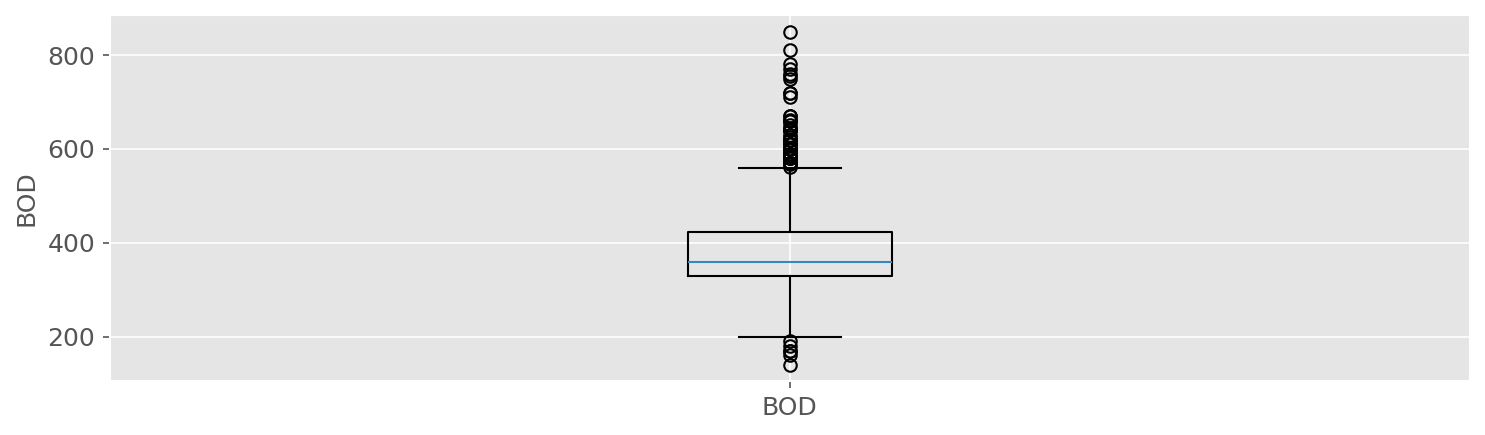

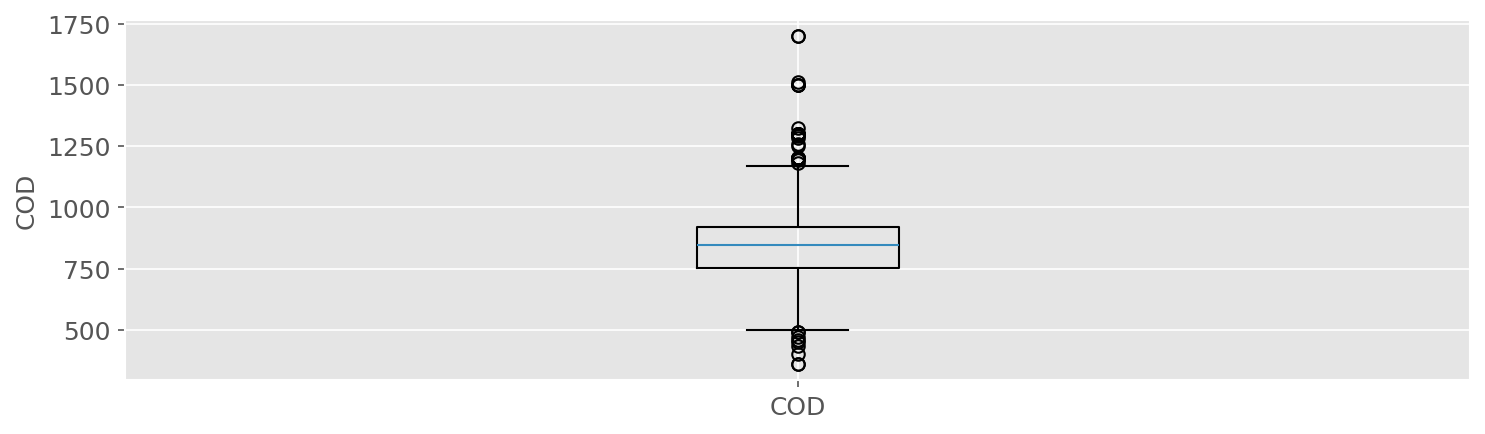

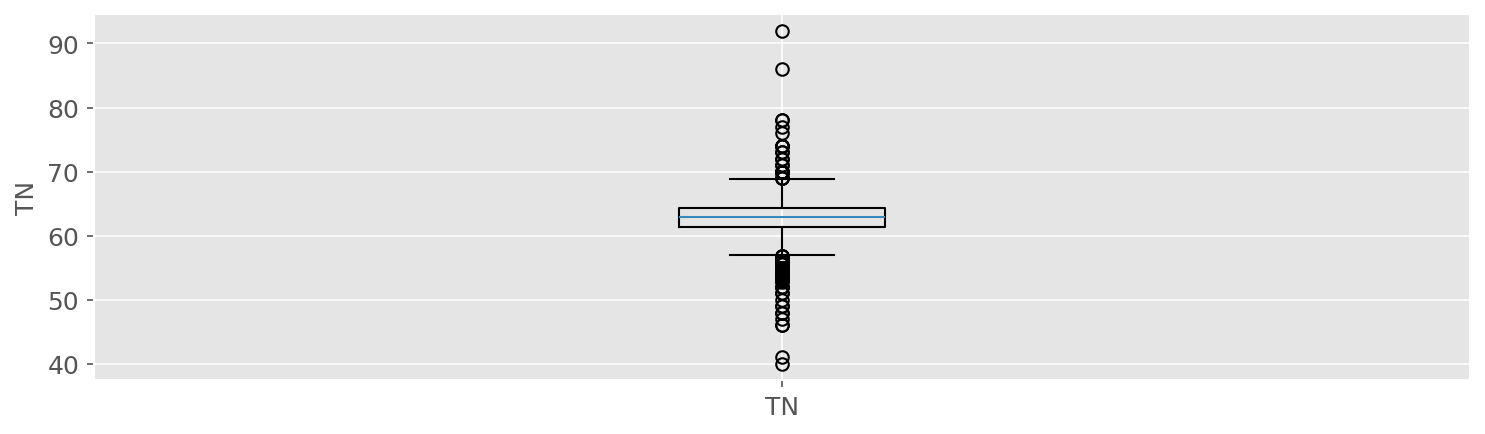

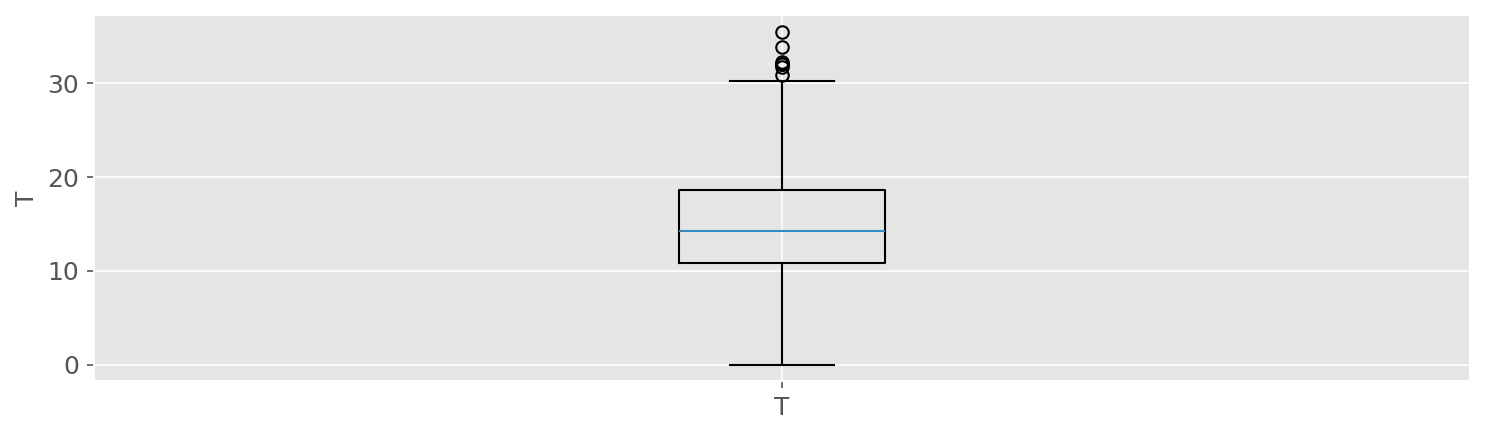

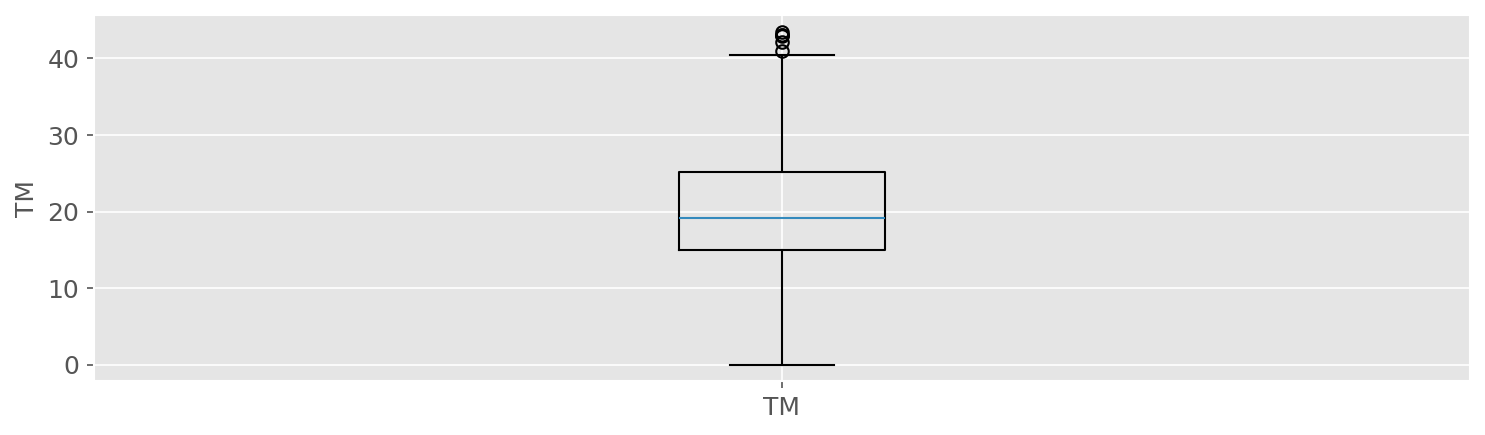

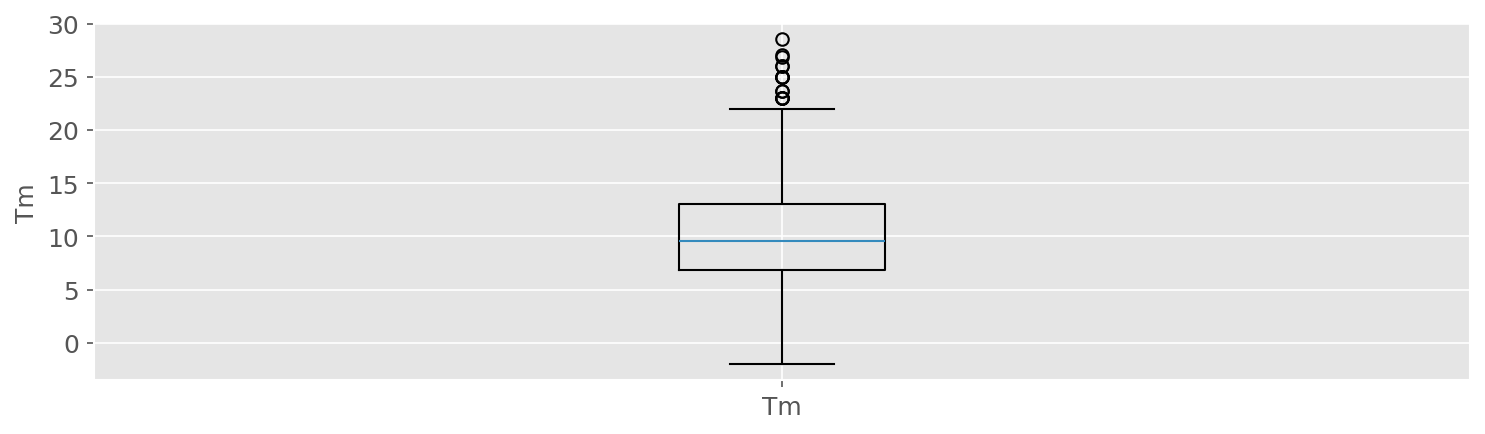

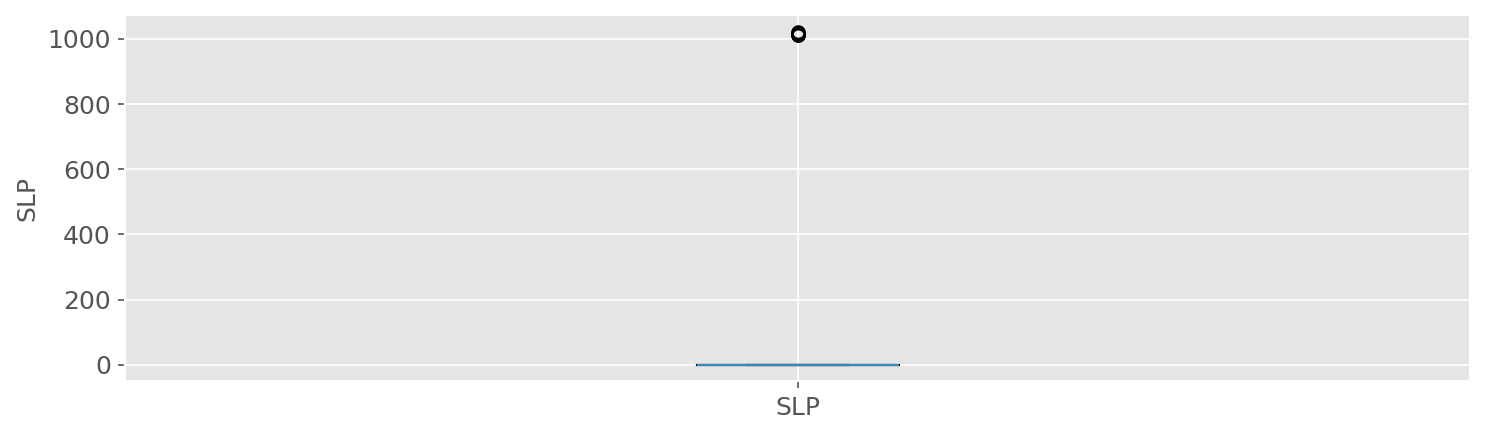

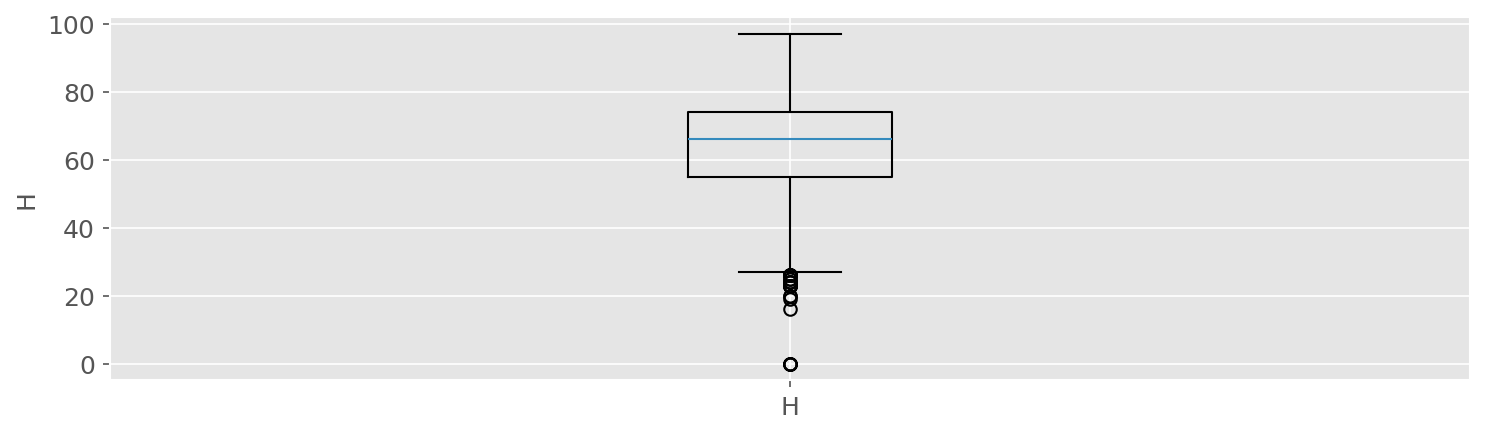

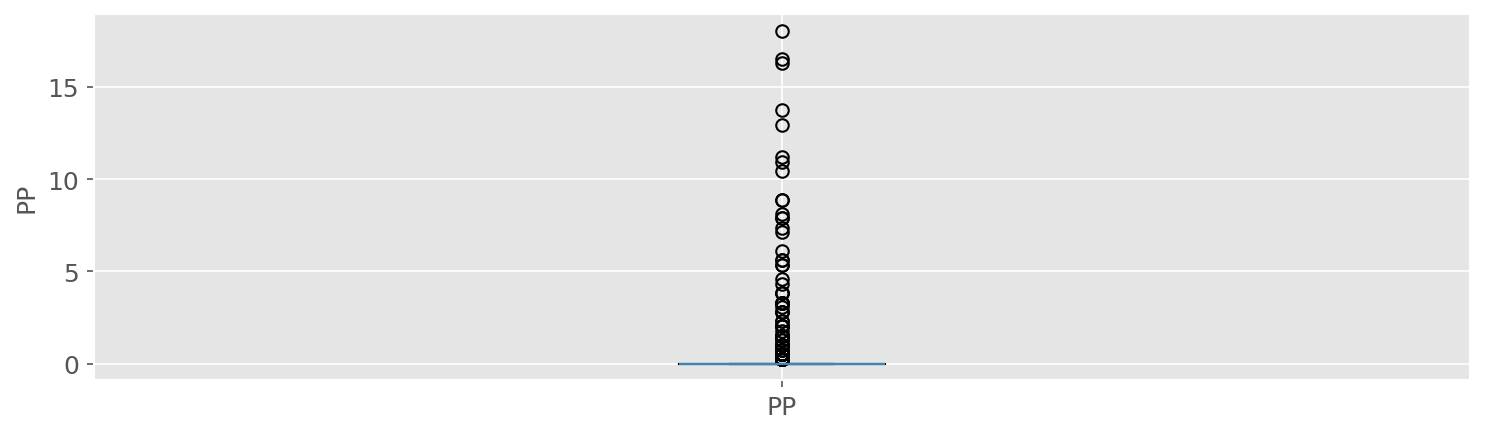

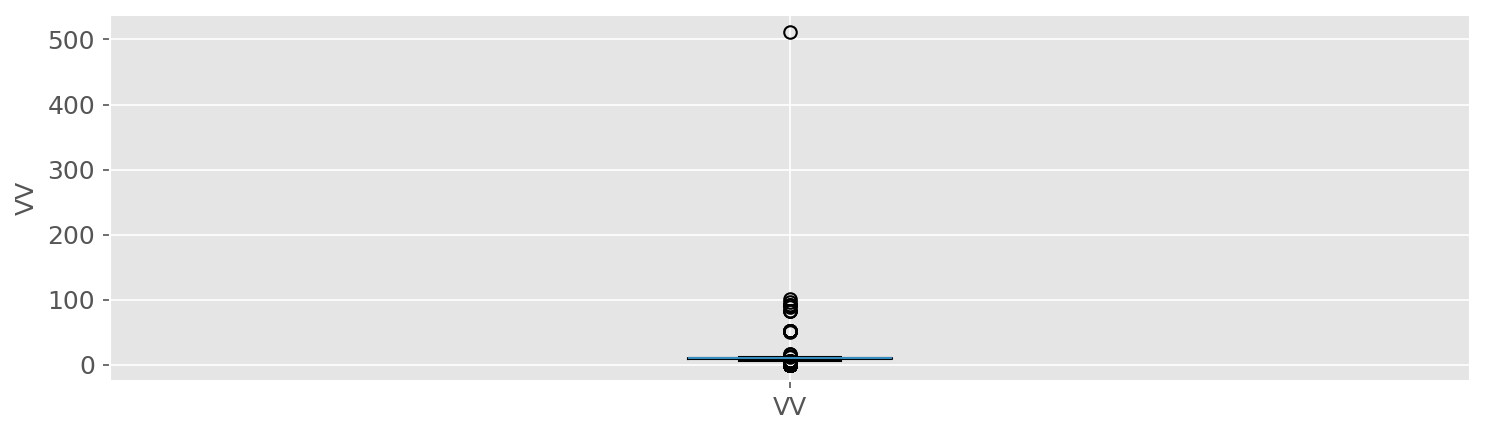

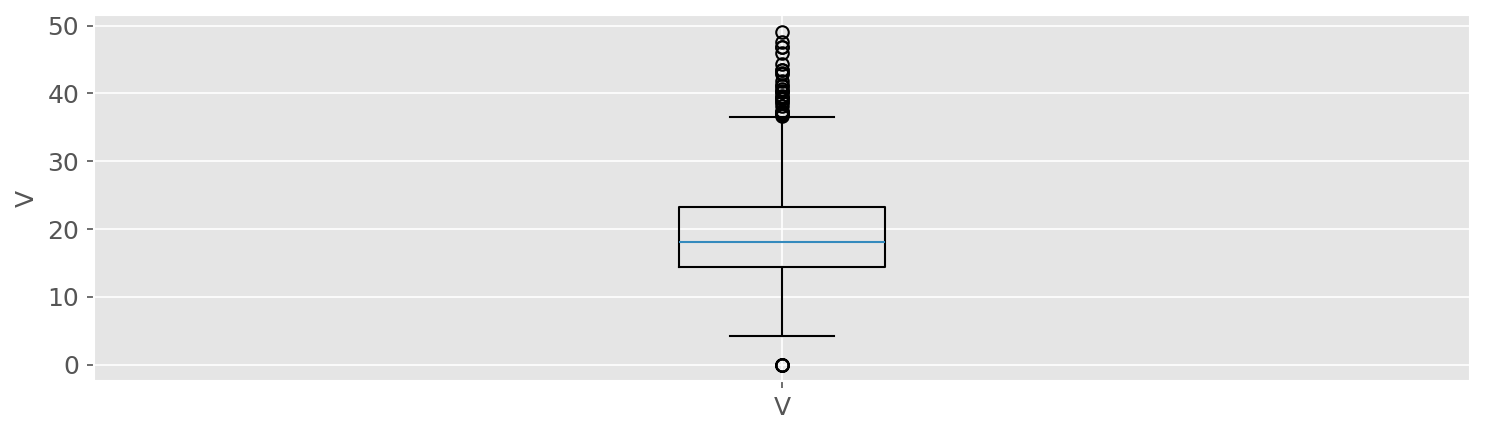

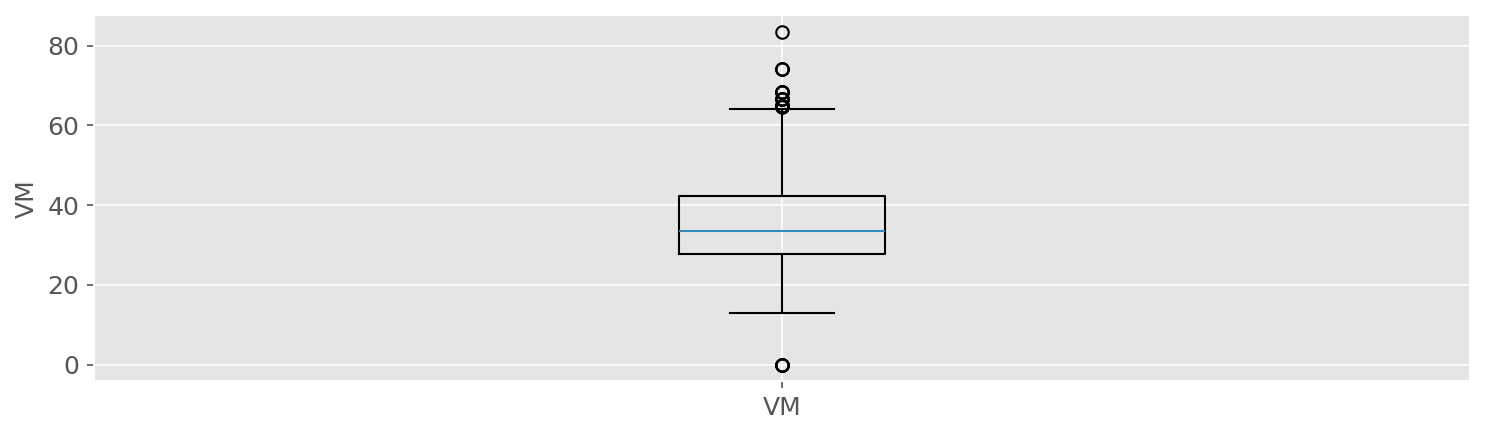

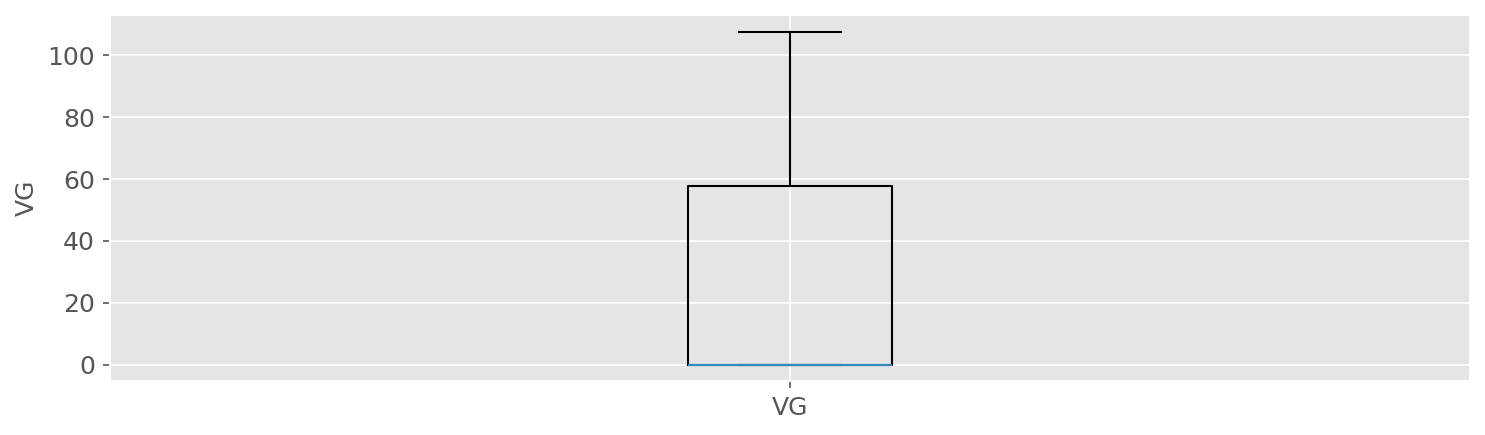

In [25]:
for i in range(0, len(df_ea.columns)):
    plt.figure(figsize=fgs, dpi=150)

    # Collect data for the boxplot
    data = df_ea[df_ea.columns[i]].dropna()

    if not data.empty:
        plt.boxplot(data)
        plt.xticks([1], [df_ea.columns[i]], fontsize=12)
        plt.ylabel(ASPl_names[i], fontsize=fnts, fontweight='normal')
        plt.tick_params(labelsize=12)
        plt.tight_layout()
    else:
        plt.text(0.5, 0.5, 'All values are NaN', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=fnts)
        plt.axis('off')

    plt.show()

## Histograms

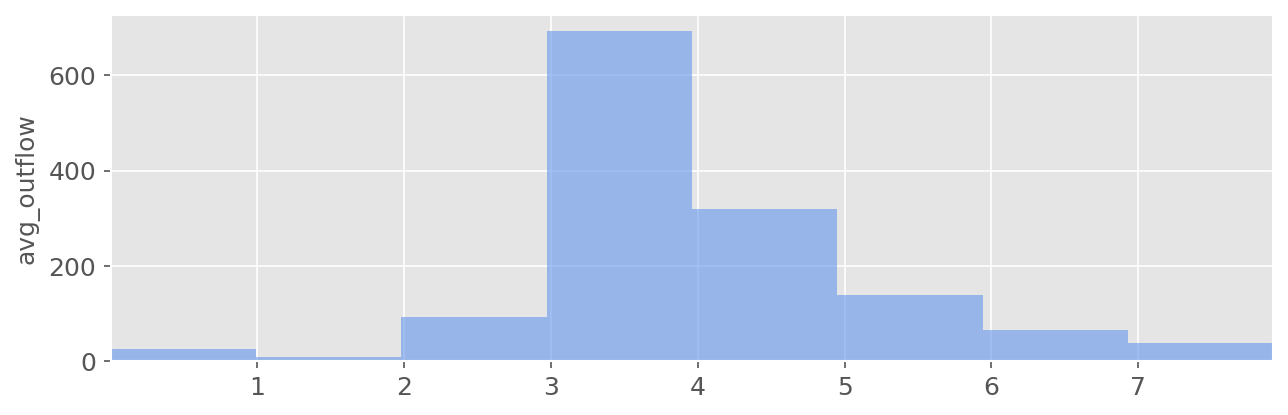

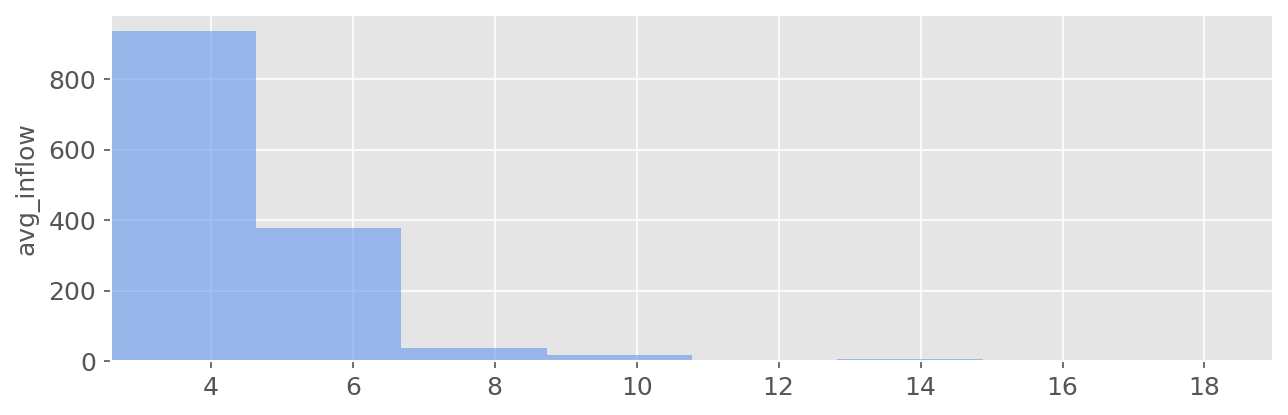

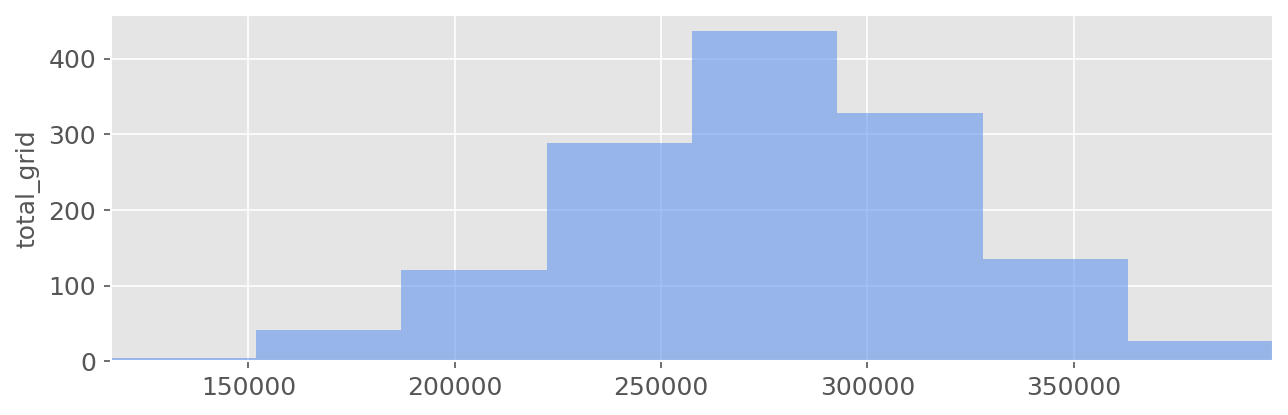

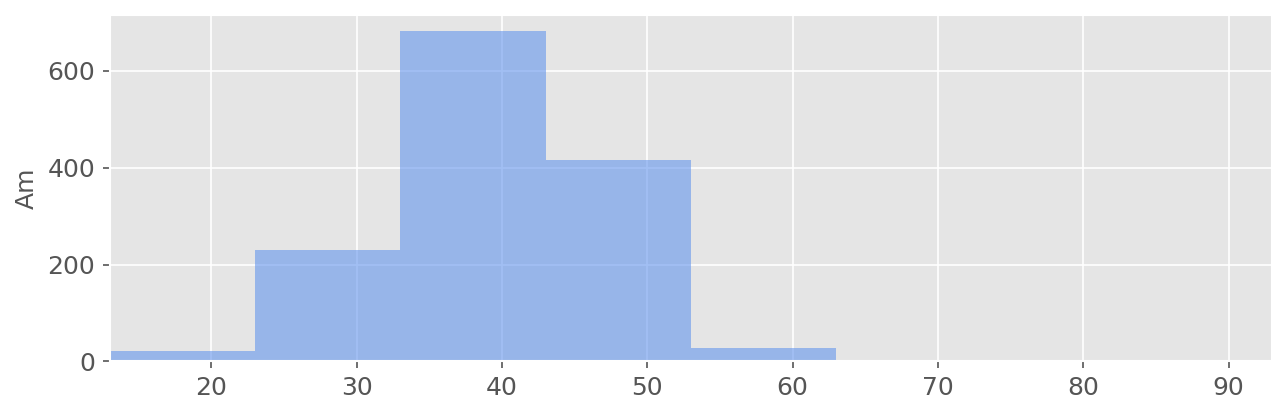

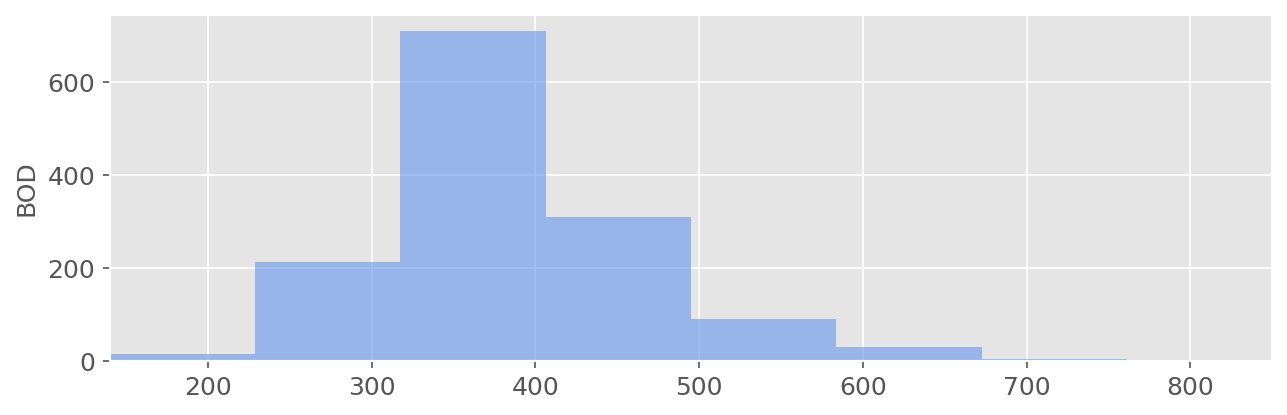

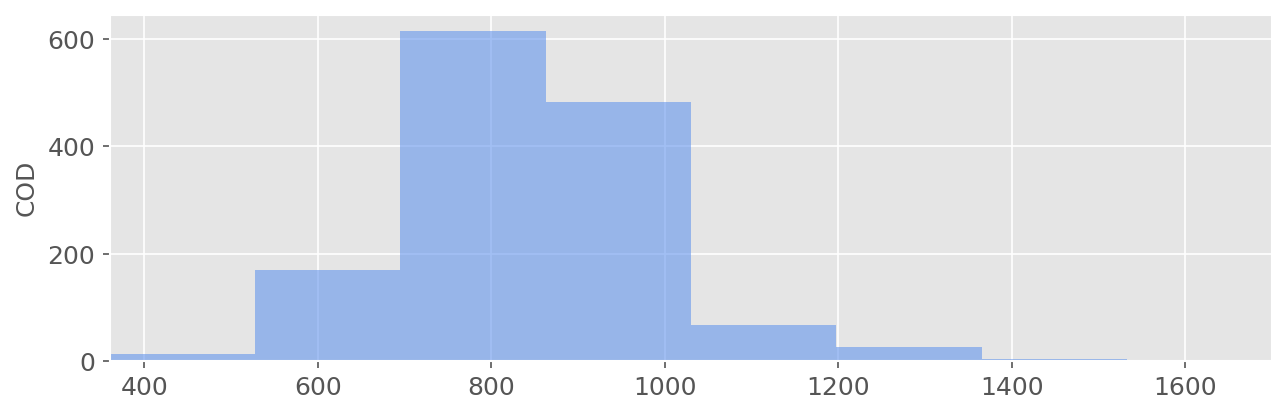

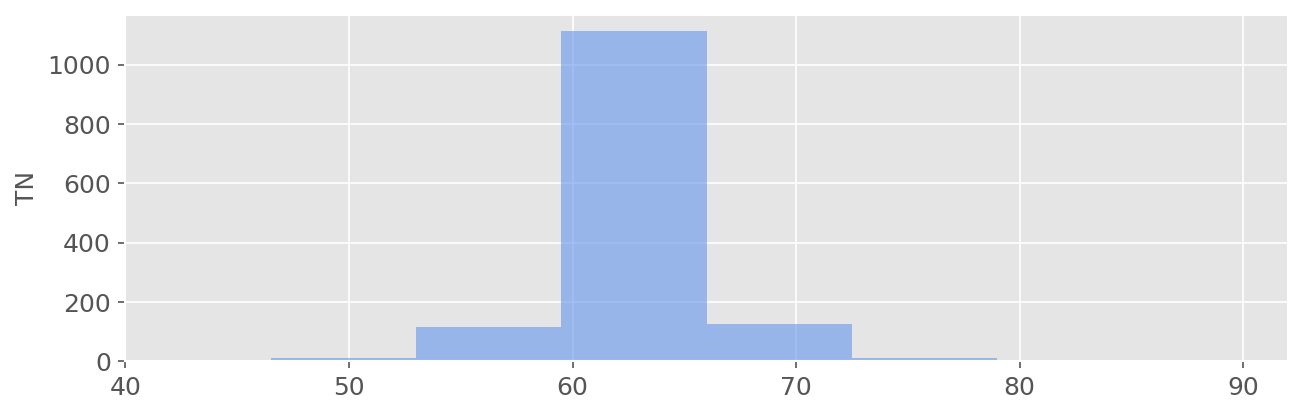

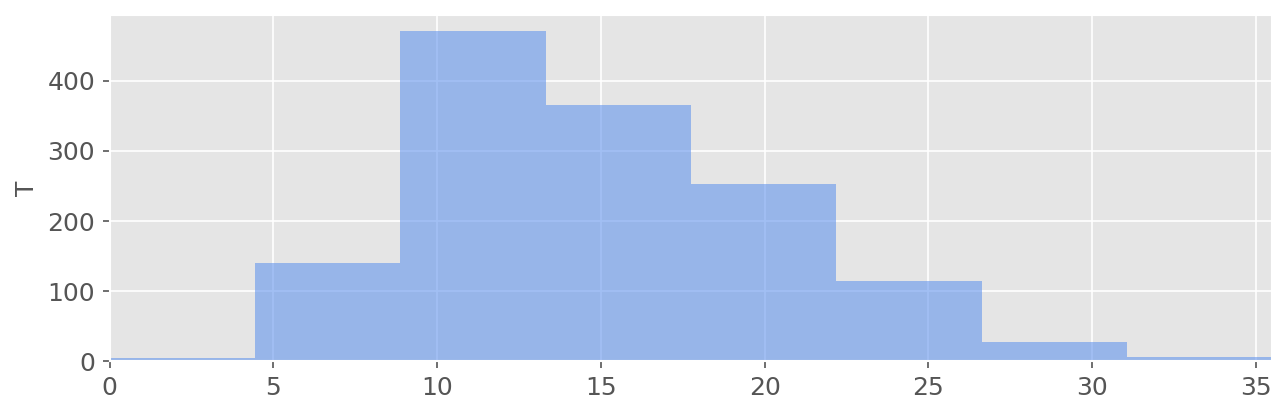

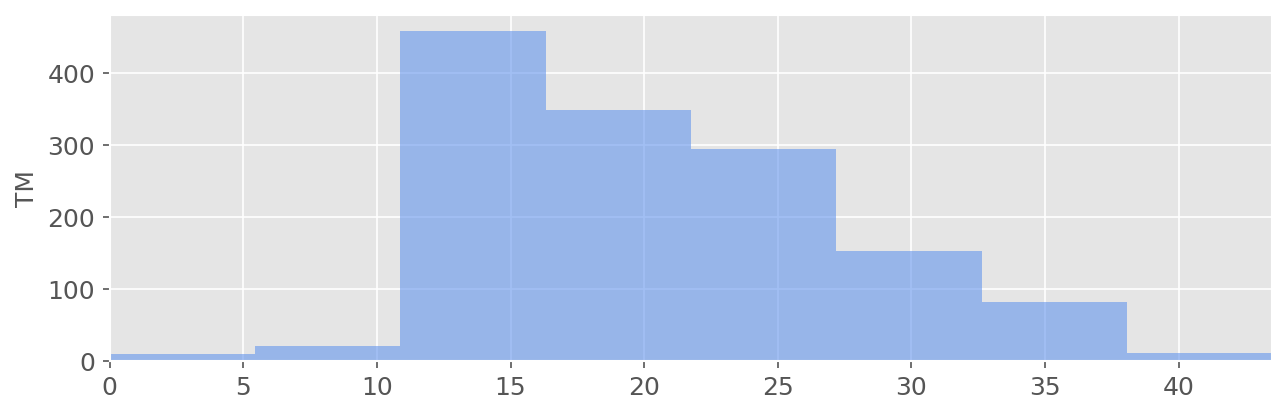

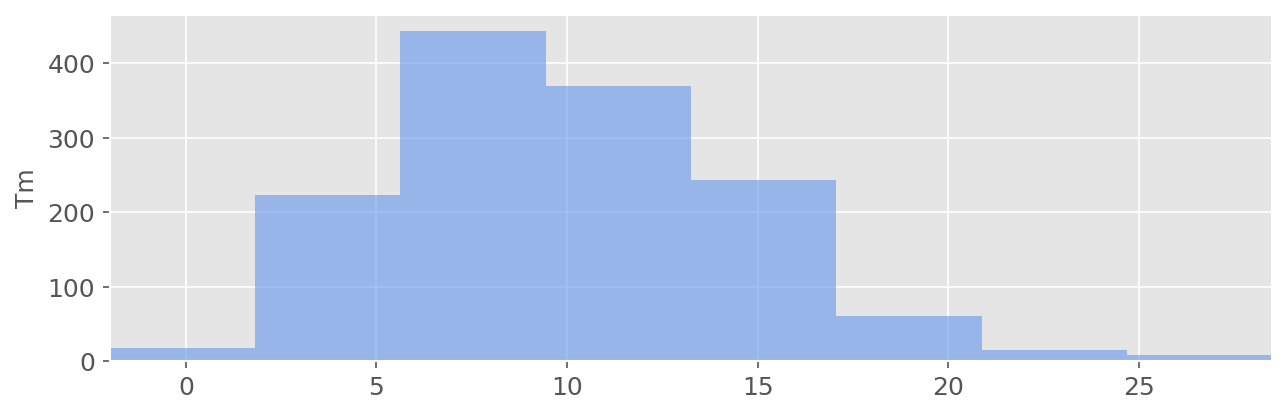

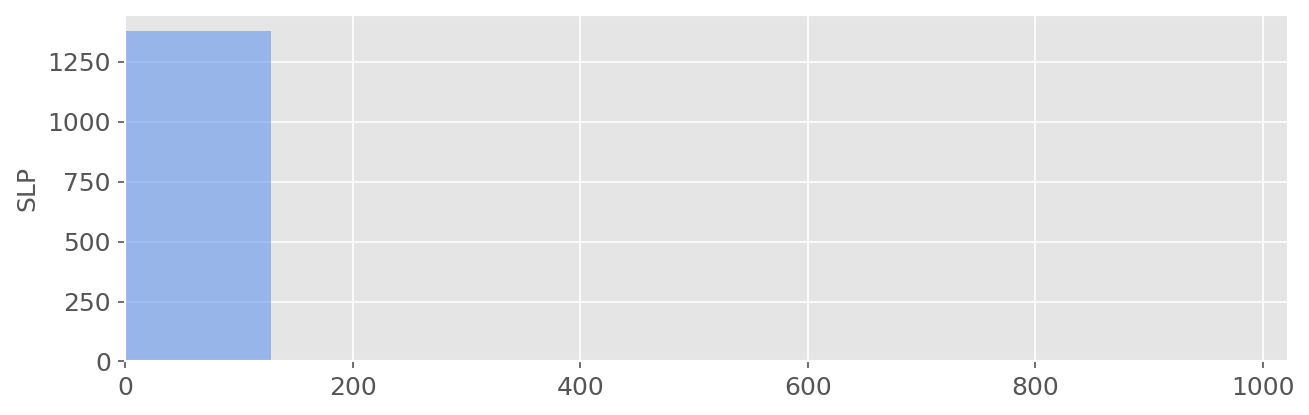

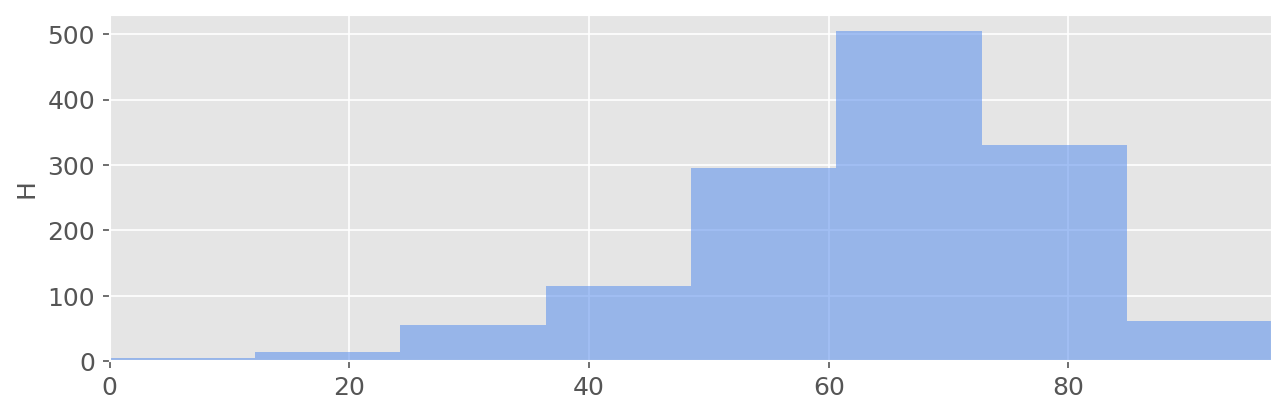

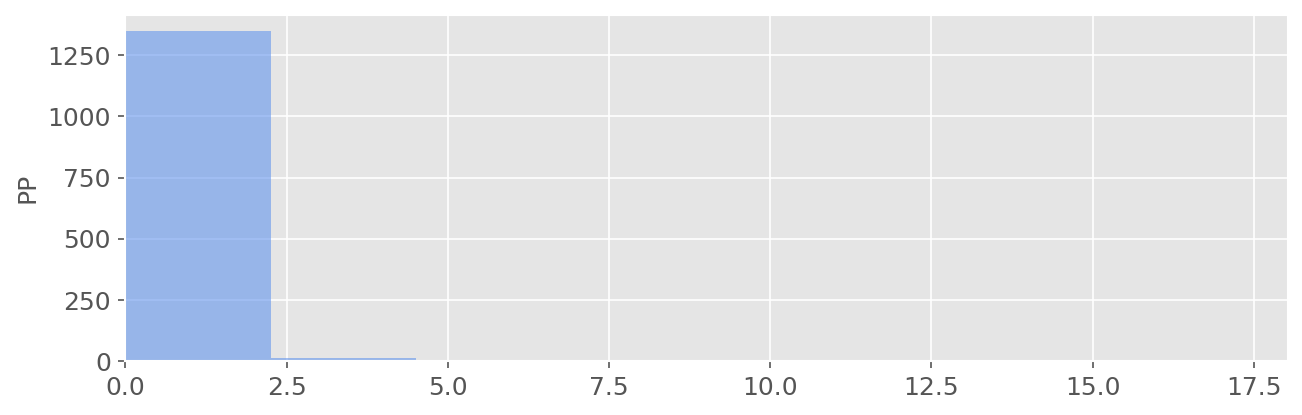

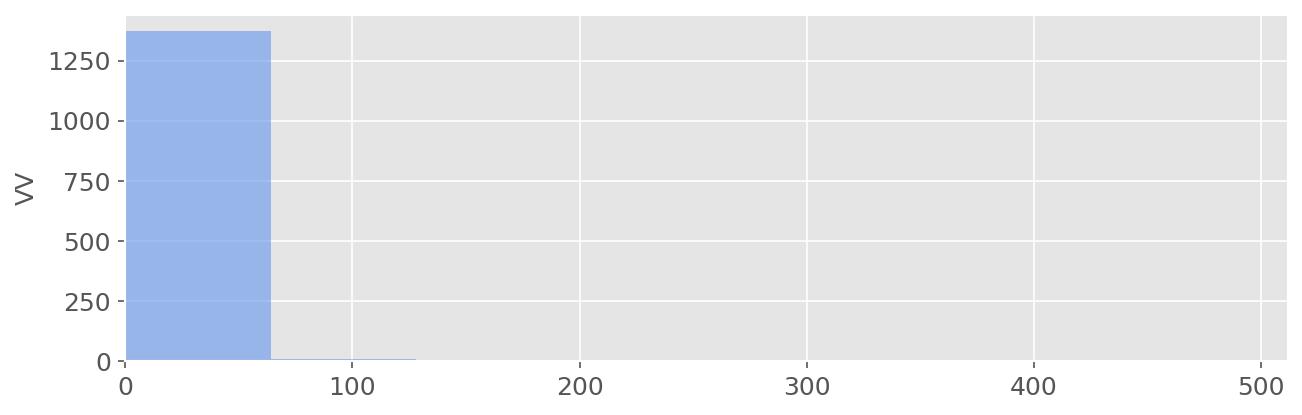

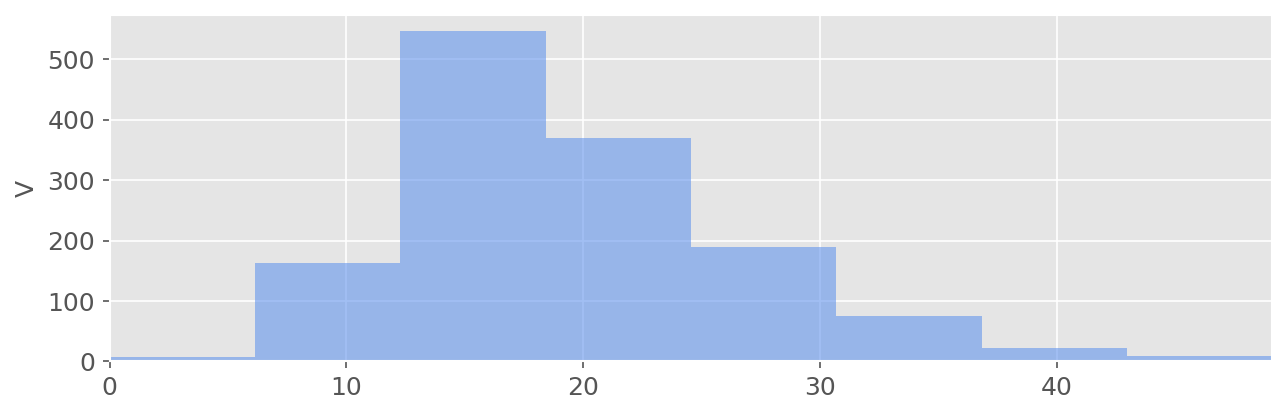

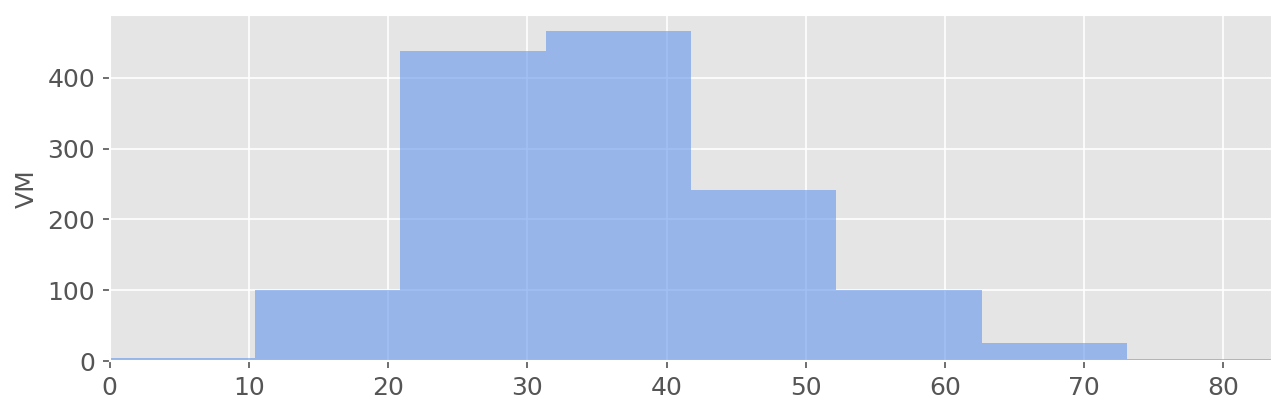

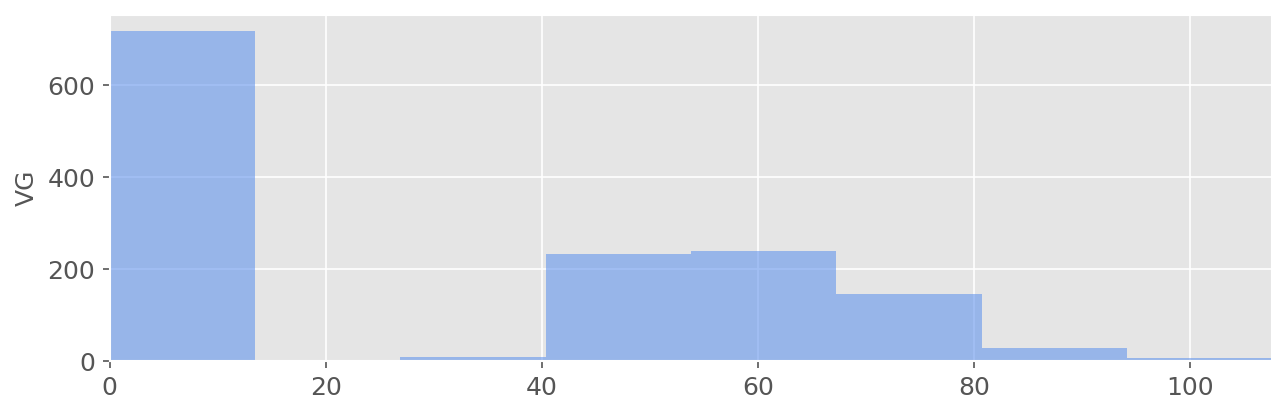

In [34]:
for i in range(0,len(df_ea.columns)):
  plt.figure(figsize=fgs, dpi=150)
  ax = df_ea[df_ea.columns[i]].plot.hist(bins=8, alpha=trs, color="cornflowerblue")
  ax.autoscale(enable=True, axis='x', tight=True)
  plt.ylabel(ASPl_names[i], fontsize=fnts, fontweight='normal')
  plt.tick_params(labelsize=12)

  plt.show()

## Correlation analysis

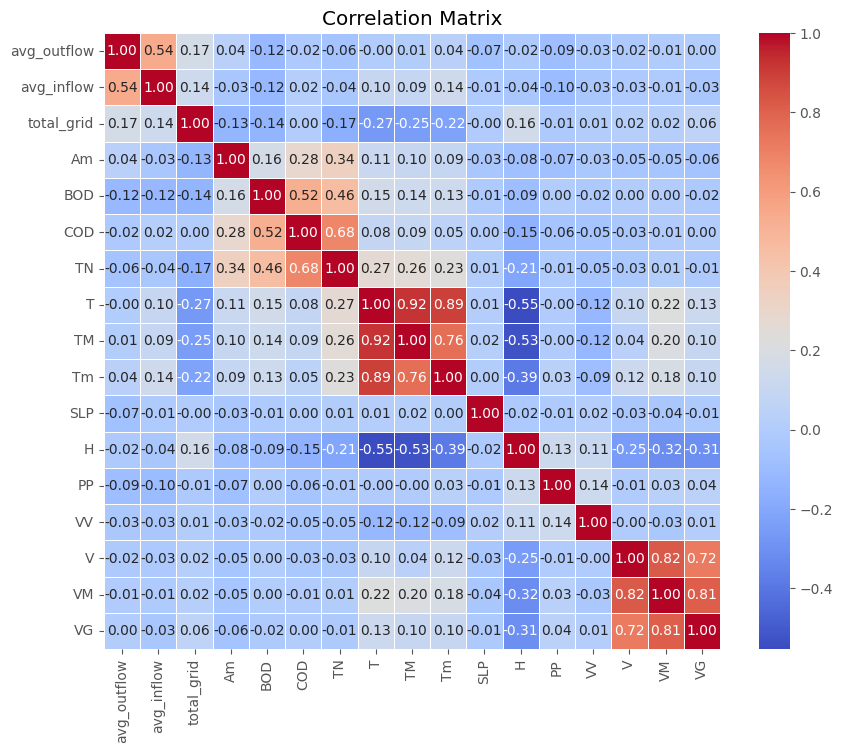

In [39]:
corr_matrix = df_ea.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True, linewidths=0.5,annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Creating the dataframe used for research

In [41]:
df_prep = df.dropna()

In [42]:
df_prep.index.duplicated().sum()

0

In [43]:
df_prep = df_prep.drop("COD", axis=1)  # Input features (exclude COD)
y = df["COD"]  # Target variable (COD)

# Variable Selection

## Explained variance

In [44]:
def svd_decomp(x):
  x_scaled = (x - x.mean())/x.std()
  u, s, vh = np.linalg.svd(x_scaled)
  n = x.shape[0]
  variances = s**2 / (n - 1)
  explained_variance_df = pd.DataFrame({
    "Component": [*range(1, len(s)+1)],
    "Variance": variances,
    "Proportion": variances/np.sum(variances),
    "Cumulative": np.cumsum(variances/np.sum(variances))
  })

  return explained_variance_df

In [45]:
scaler = StandardScaler()
features = df_prep.columns
x = df_prep.loc[:, features].values
x = scaler.fit_transform(x)

explained_var = svd_decomp(x)

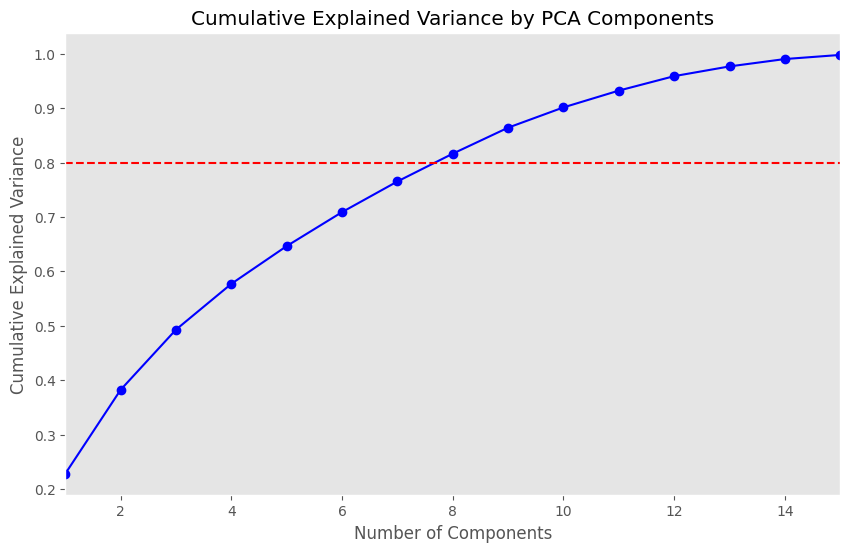

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(explained_var['Component'], explained_var['Cumulative'], marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlim(1,15)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.grid()
plt.show()

In [47]:
explained_var['Cumulative'].iloc[7]

0.8163097784119264

8 principal components yield more than 80% of the explained variance

## Conventional PCA

In [48]:
def conventional_pca(x,n_components):
  pca = PCA(n_components)
  pca.fit(x)
  x_pca = pca.transform(x)

  #Performing T^2 analysis
  a = n_components
  n = x.shape[0]
  eigenvalues = pca.explained_variance_
  T2 = np.sum((x_pca**2) / eigenvalues, axis=1)

  # Calculating the T^2 limit
  alpha = 0.025  # For 97.5% confidence level
  T2_limit = (a * (n - 1) / (n - a)) * f.ppf(1 - alpha, a, n - a)
  print("T^2 limit:", T2_limit)

  #Performing Q-statistic analysis
  x_reconstructed = pca.inverse_transform(x_pca)
  residuals = x - x_reconstructed
  Q_statistic = np.sum(residuals**2, axis=1)

  #Calculating the Q-statistic limit
  degrees_of_freedom = x.shape[1] - n_components #number of variables free to vary after the pca
  Q_limit = chi2.ppf(1 - alpha, degrees_of_freedom)
  print("Q-statistic limit:", Q_limit)

  return x_pca, T2, T2_limit, Q_statistic, Q_limit

In [49]:
x_pca, T2, T2_lim, Q_statistic, Q_lim  = conventional_pca(x,8)

T^2 limit: 17.697988733690714
Q-statistic limit: 17.534546139484647


In [50]:
dates = pd.to_datetime(df_prep.index)
outlier_periods_t2 = []
in_period = False
start_date = None
count = 0

for i in range(len(T2)):
    if T2[i] > T2_lim:
        if not in_period:
            start_date = dates[i]
            in_period = True
            count = 1
        else:
            count += 1
    else:
        if in_period:
            if count > 1:
                end_date = dates[i - 1]
                outlier_periods_t2.append((start_date, end_date))
            in_period = False

# Check if the last period extends to the end of the dataset and has more than 1 sample
if in_period and count > 1:
    end_date = dates[len(T2) - 1]
    outlier_periods_t2.append((start_date, end_date))

# Print the periods of high T^2 statistics
print("Quantity of Abnormal periods:", len(outlier_periods_t2))
for start, end in outlier_periods_t2:
    print("Start date of high T^2 period:", start)
    print("End date of high T^2 period:", end)

Quantity of Abnormal periods: 7
Start date of high T^2 period: 2014-03-26 00:00:00
End date of high T^2 period: 2014-03-27 00:00:00
Start date of high T^2 period: 2014-04-08 00:00:00
End date of high T^2 period: 2014-04-10 00:00:00
Start date of high T^2 period: 2016-08-22 00:00:00
End date of high T^2 period: 2016-08-23 00:00:00
Start date of high T^2 period: 2017-01-04 00:00:00
End date of high T^2 period: 2017-01-08 00:00:00
Start date of high T^2 period: 2017-12-11 00:00:00
End date of high T^2 period: 2017-12-12 00:00:00
Start date of high T^2 period: 2018-03-04 00:00:00
End date of high T^2 period: 2018-03-05 00:00:00
Start date of high T^2 period: 2019-01-14 00:00:00
End date of high T^2 period: 2019-01-15 00:00:00


In [51]:
#adjusting the dates on the plots
date_samples = df_prep.index[15::200]  # Starting on the 15th with a step of 200, this was chosen arbitrarily
sample_numbers = date_samples
tick_labels = [date.strftime('%d-%b') for date in sample_numbers] #customizing the tick labels format

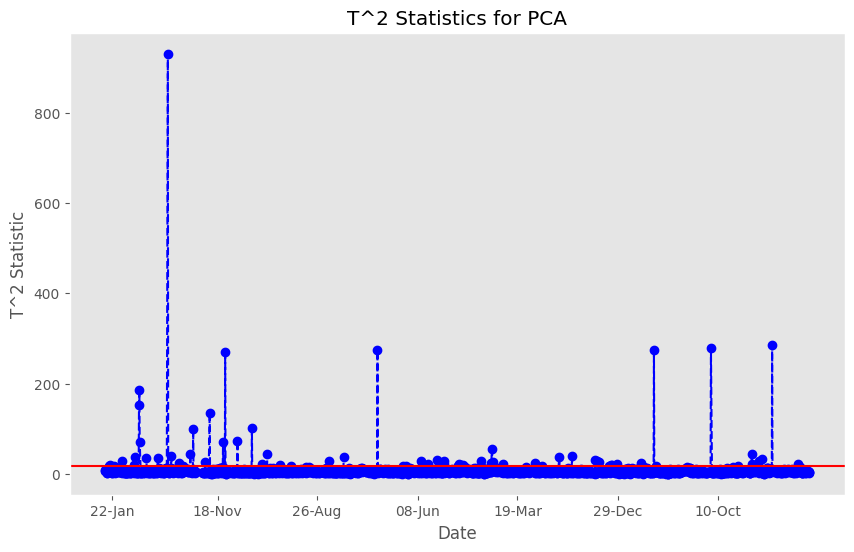

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(dates, T2, marker='o', linestyle='--', color='b')
plt.axhline(y=T2_lim, color='r', linestyle='-')
plt.title('T^2 Statistics for PCA')
plt.xticks(date_samples,tick_labels)
plt.xlabel('Date')
plt.ylabel('T^2 Statistic')
plt.grid()
plt.show()

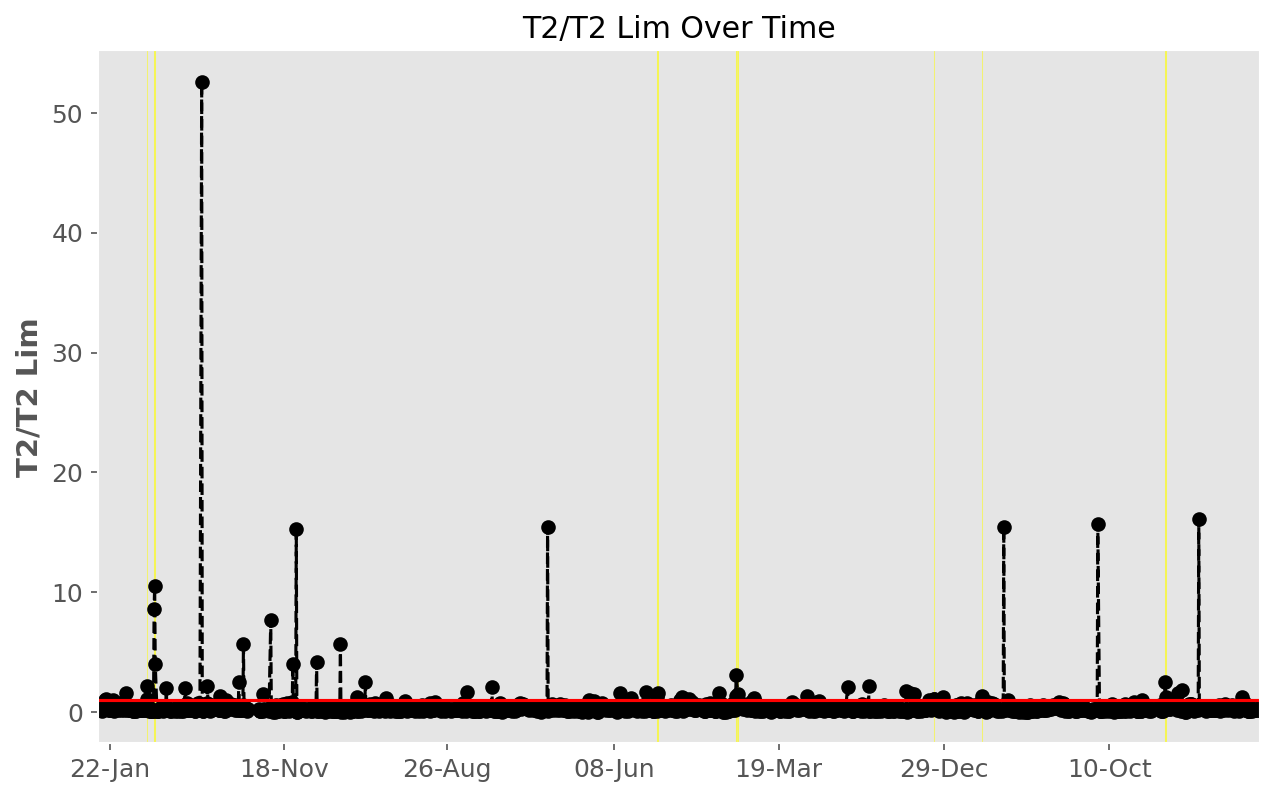

In [53]:
df_T2_ratio = pd.DataFrame({
    'T2/T2_lim': T2 / T2_lim
}, index=dates)

fgs = (10, 6)
plt.figure(figsize=fgs, dpi=150)
plt.plot(df_T2_ratio, color='black', marker='o', linestyle='--')
plt.hlines(1, xmin=df_T2_ratio.index[0], xmax=df_T2_ratio.index[-1], colors='red')

for start, end in outlier_periods_t2:
    plt.axvspan(start, end, ymin=0, ymax=1, color='yellow', alpha=0.5)

plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('T2/T2 Lim', fontsize=14, fontweight='bold')
plt.xticks(date_samples,tick_labels)
plt.tick_params(labelsize=12)
plt.title('T2/T2 Lim Over Time')
plt.grid()
plt.show()

In [54]:
outlier_periods_q = []
in_period = False
start_date = None
count = 0

for i in range(len(Q_statistic)):
    if Q_statistic[i] > Q_lim:
        if not in_period:
            start_date = dates[i]
            in_period = True
            count = 1
        else:
            count += 1
    else:
        if in_period:
            if count > 1:
                end_date = dates[i - 1]
                outlier_periods_q.append((start_date, end_date))
            in_period = False

# Check if the last period extends to the end of the dataset and has more than 2 samples
if in_period and count > 1:
    end_date = dates[len(Q_statistic) - 1]
    outlier_periods_q.append((start_date, end_date))

# Print the periods of high Q statistics
print("Quantity of Abnormal periods:", len(outlier_periods_q))
for start, end in outlier_periods_q:
    print("Start date of high Q-statistic period:", start)
    print("End date of high Q-statistic period:", end)

Quantity of Abnormal periods: 2
Start date of high Q-statistic period: 2018-11-18 00:00:00
End date of high Q-statistic period: 2018-11-20 00:00:00
Start date of high Q-statistic period: 2019-05-16 00:00:00
End date of high Q-statistic period: 2019-05-19 00:00:00


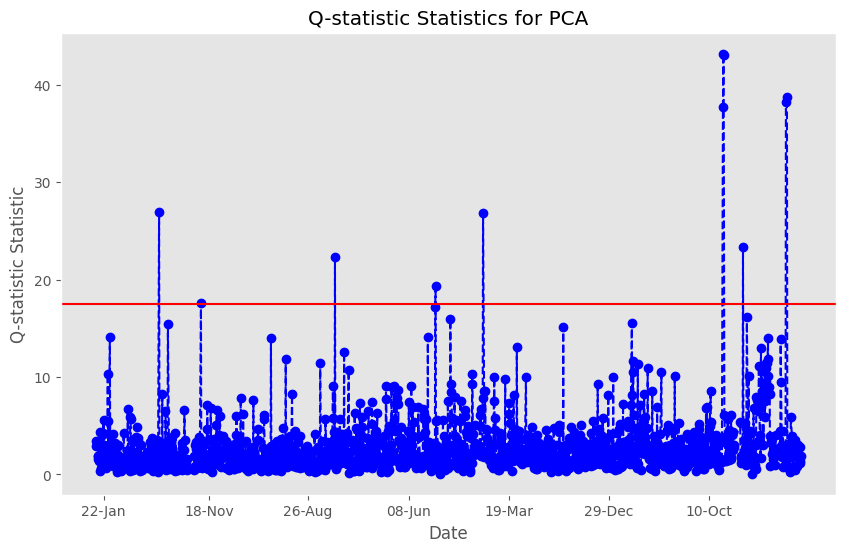

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(dates, Q_statistic, marker='o', linestyle='--', color='b')
plt.axhline(y=Q_lim, color='r', linestyle='-')  # Add horizontal line at T^2 limit
plt.title('Q-statistic Statistics for PCA')
plt.xticks(date_samples,tick_labels)
plt.xlabel('Date')
plt.ylabel('Q-statistic Statistic')
plt.grid()
plt.show()

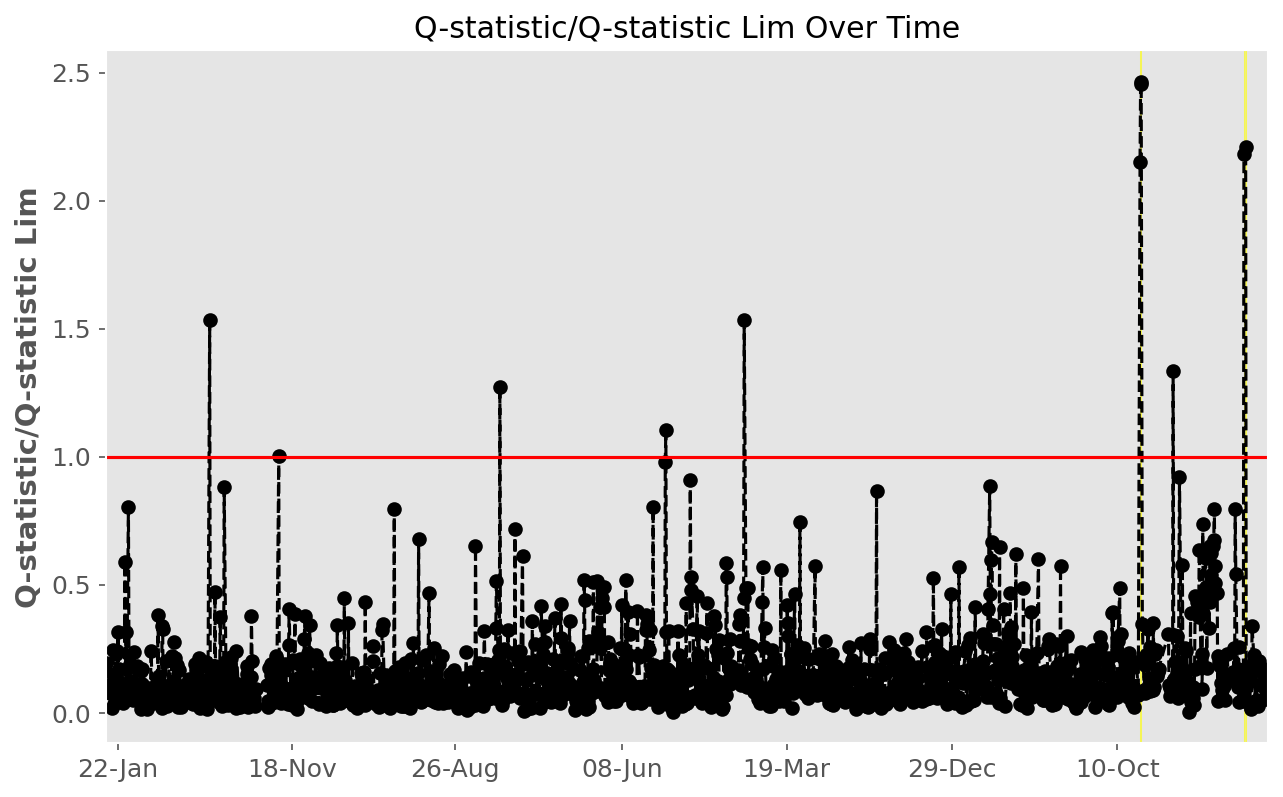

In [56]:
df_Q_ratio = pd.DataFrame({
    'Q/Q_lim': Q_statistic / Q_lim
}, index=dates)

plt.figure(figsize=(10,6), dpi=150)
plt.plot(df_Q_ratio, color='black', marker='o', linestyle='--')
plt.hlines(1, xmin=df_Q_ratio.index[0], xmax=df_Q_ratio.index[-1], colors='red')

for start, end in outlier_periods_q:
    plt.axvspan(start, end, ymin=0, ymax=1, color='yellow', alpha=0.5)

plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Q-statistic/Q-statistic Lim', fontsize=14, fontweight='bold')
plt.xticks(date_samples,tick_labels)
plt.tick_params(labelsize=12)
plt.title('Q-statistic/Q-statistic Lim Over Time')
plt.grid()
plt.show()

## Robust PCA

In [57]:
#creating the function

def robust_pca(x,n_components):

  pca = RobustPCA(n_components=n_components, contamination=0.1)  # Assume 10% of data is outliers
  pca.fit(x)
  x_pca = np.dot(x - pca.mean_, pca.components_.T)

  #Performing T^2 analysis
  a = n_components
  n = x.shape[0]
  eigenvalues = pca.explained_variance_
  T2 = np.sum((x_pca**2) / eigenvalues, axis=1)

  # Calculating the T^2 limit
  alpha = 0.025  # For 97.5% confidence level
  T2_limit = (a * (n - 1) / (n - a)) * f.ppf(1 - alpha, a, n - a)
  print("T^2 limit:", T2_limit)

  #Performing Q-statistic analysis
  x_reconstructed = np.dot(x_pca, pca.components_) + pca.mean_
  residuals = x - x_reconstructed
  Q_statistic = np.sum(residuals**2, axis=1)

  #Calculating the Q-statistic limit
  degrees_of_freedom = x.shape[1] - n_components #number of variables free to vary after the pca
  Q_limit = chi2.ppf(1 - alpha, degrees_of_freedom)
  print("Q-statistic limit:", Q_limit)

  return x_pca, T2, T2_limit, Q_statistic, Q_limit

In [58]:
x_rob_pca, T2_rob, T2_lim_rob, Q_statistic_rob, Q_lim_rob  = robust_pca(x,8)

T^2 limit: 17.697988733690714
Q-statistic limit: 17.534546139484647


In [59]:
outlier_periods_t2_rob = []
in_period = False
start_date = None
count = 0

for i in range(len(T2_rob)):
    if T2_rob[i] > T2_lim_rob:
        if not in_period:
            start_date = dates[i]
            in_period = True
            count = 1
        else:
            count += 1
    else:
        if in_period:
            if count > 1:
                end_date = dates[i - 1]
                outlier_periods_t2_rob.append((start_date, end_date))
            in_period = False

# Check if the last period extends to the end of the dataset and has more than 1 sample
if in_period and count > 1:
    end_date = dates[len(T2_rob) - 1]
    outlier_periods_t2_rob.append((start_date, end_date))

# Print the periods of high T^2 statistics
print("Quantity of Abnormal periods:", len(outlier_periods_t2_rob))
for start, end in outlier_periods_t2_rob:
    print("Start date of high T^2 period:", start)
    print("End date of high T^2 period:", end)

Quantity of Abnormal periods: 7
Start date of high T^2 period: 2014-03-26 00:00:00
End date of high T^2 period: 2014-03-27 00:00:00
Start date of high T^2 period: 2014-04-08 00:00:00
End date of high T^2 period: 2014-04-10 00:00:00
Start date of high T^2 period: 2016-08-22 00:00:00
End date of high T^2 period: 2016-08-23 00:00:00
Start date of high T^2 period: 2017-01-04 00:00:00
End date of high T^2 period: 2017-01-08 00:00:00
Start date of high T^2 period: 2017-12-11 00:00:00
End date of high T^2 period: 2017-12-12 00:00:00
Start date of high T^2 period: 2018-03-04 00:00:00
End date of high T^2 period: 2018-03-05 00:00:00
Start date of high T^2 period: 2019-01-14 00:00:00
End date of high T^2 period: 2019-01-15 00:00:00


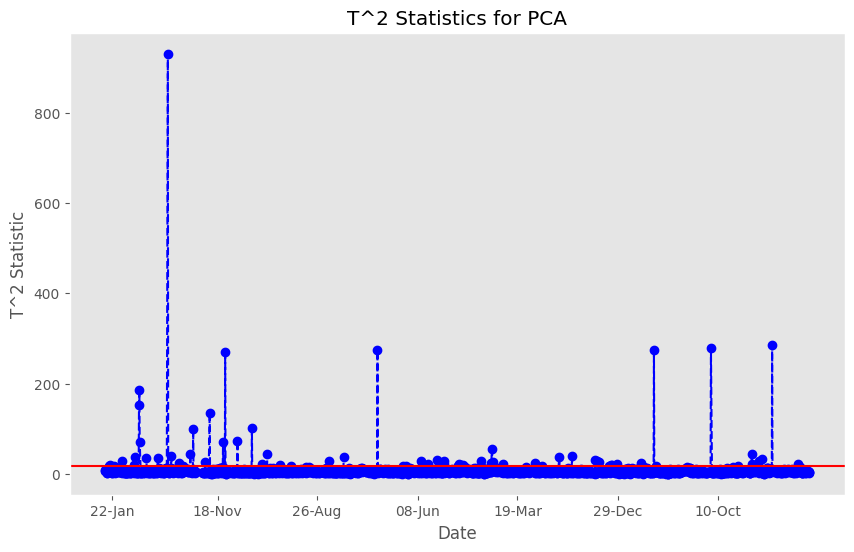

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(dates, T2_rob, marker='o', linestyle='--', color='b')
plt.axhline(y=T2_lim_rob, color='r', linestyle='-')
plt.title('T^2 Statistics for PCA')
plt.xticks(date_samples,tick_labels)
plt.xlabel('Date')
plt.ylabel('T^2 Statistic')
plt.grid()
plt.show()

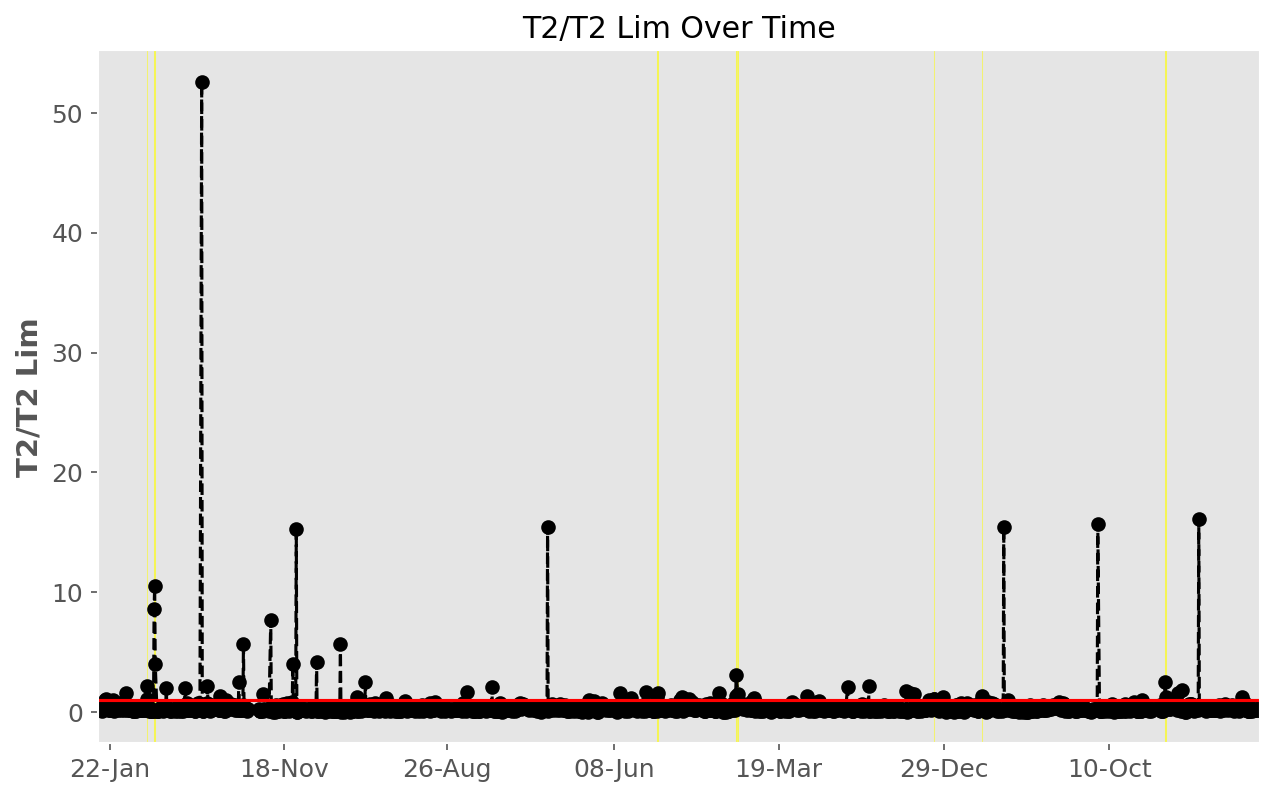

In [61]:
df_T2_ratio_rob = pd.DataFrame({
    'T2/T2_lim': T2_rob / T2_lim_rob
}, index=dates)

plt.figure(figsize=(10,6), dpi=150)
plt.plot(df_T2_ratio_rob, color='black', marker='o', linestyle='--')
plt.hlines(1, xmin=df_T2_ratio_rob.index[0], xmax=df_T2_ratio_rob.index[-1], colors='red')

for start, end in outlier_periods_t2_rob:
    plt.axvspan(start, end, ymin=0, ymax=1, color='yellow', alpha=0.5)

plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('T2/T2 Lim', fontsize=14, fontweight='bold')
plt.xticks(date_samples,tick_labels)
plt.tick_params(labelsize=12)
plt.title('T2/T2 Lim Over Time')
plt.grid()
plt.show()

In [62]:
outlier_periods_q_rob = []
in_period = False
start_date = None
count = 0

for i in range(len(Q_statistic_rob)):
    if Q_statistic_rob[i] > Q_lim_rob:
        if not in_period:
            start_date = dates[i]
            in_period = True
            count = 1
        else:
            count += 1
    else:
        if in_period:
            if count > 1:
                end_date = dates[i - 1]
                outlier_periods_q_rob.append((start_date, end_date))
            in_period = False

# Check if the last period extends to the end of the dataset and has more than 2 samples
if in_period and count > 1:
    end_date = dates[len(Q_statistic_rob) - 1]
    outlier_periods_q_rob.append((start_date, end_date))

# Print the periods of high Q statistics
print("Quantity of abnormal periods:", len(outlier_periods_q_rob))
for start, end in outlier_periods_q_rob:
    print("Start date of high Q-statistic period:", start)
    print("End date of high Q-statistic period:", end)

Quantity of abnormal periods: 2
Start date of high Q-statistic period: 2018-11-18 00:00:00
End date of high Q-statistic period: 2018-11-20 00:00:00
Start date of high Q-statistic period: 2019-05-16 00:00:00
End date of high Q-statistic period: 2019-05-19 00:00:00


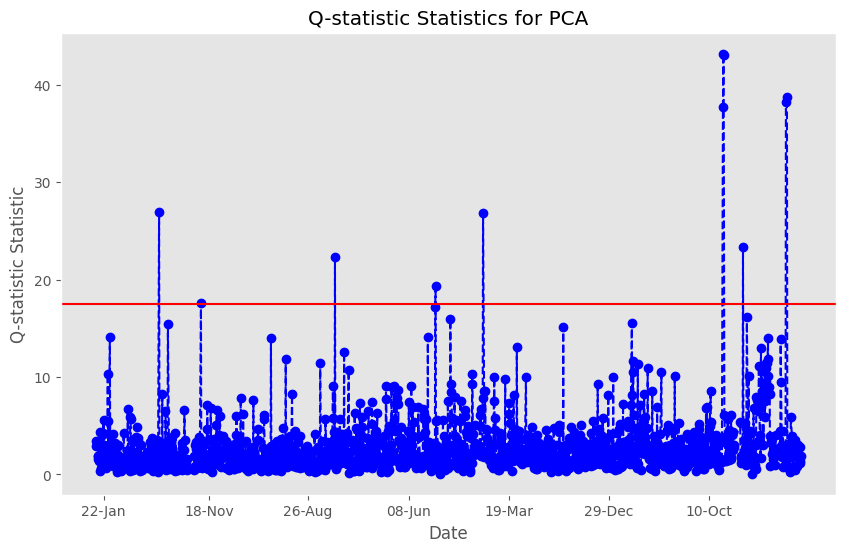

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(dates, Q_statistic_rob, marker='o', linestyle='--', color='b')
plt.axhline(y=Q_lim_rob, color='r', linestyle='-')
plt.title('Q-statistic Statistics for PCA')
plt.xticks(date_samples,tick_labels)
plt.xlabel('Date')
plt.ylabel('Q-statistic Statistic')
plt.grid()
plt.show()

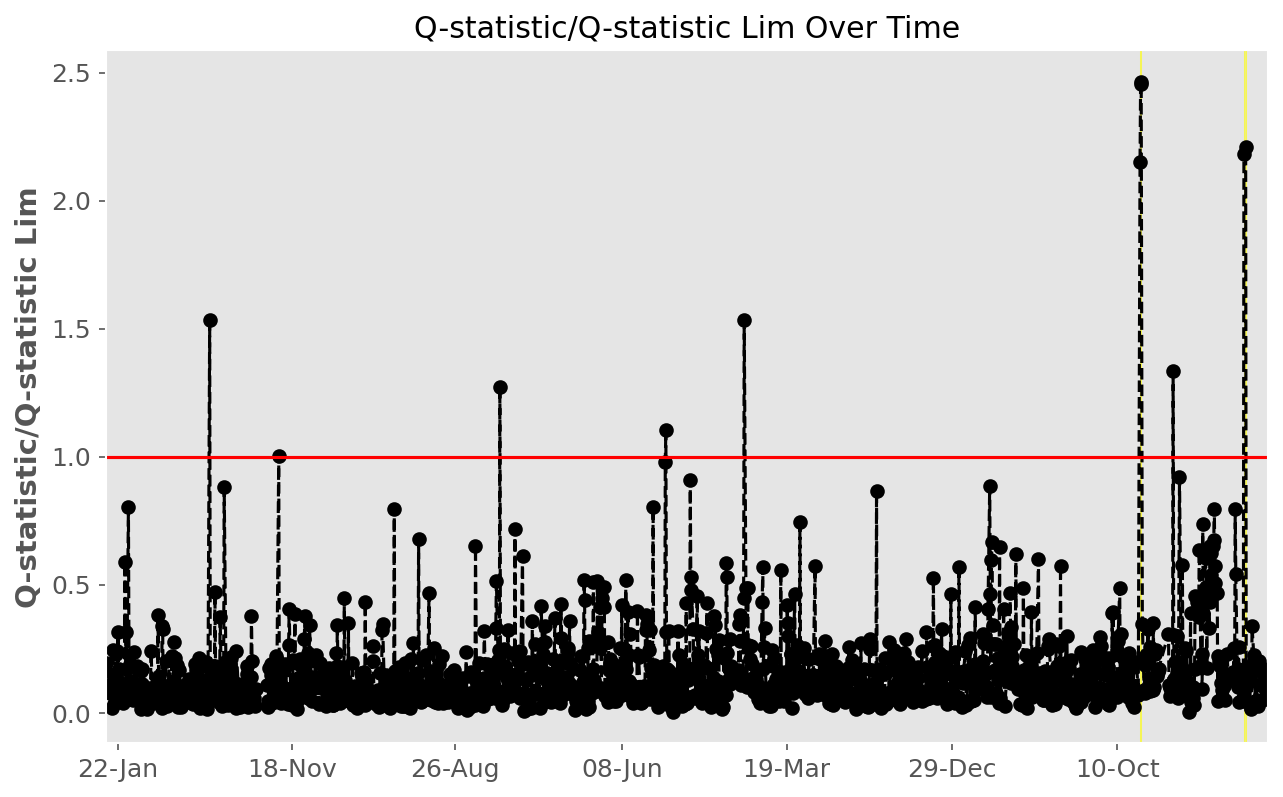

In [64]:
df_Q_ratio_rob = pd.DataFrame({
    'Q/Q_lim': Q_statistic_rob / Q_lim_rob
}, index=dates)

plt.figure(figsize=(10,6), dpi=150)
plt.plot(df_Q_ratio_rob, color='black', marker='o', linestyle='--')
plt.hlines(1, xmin=df_Q_ratio_rob.index[0], xmax=df_Q_ratio_rob.index[-1], colors='red')

for start, end in outlier_periods_q_rob:
    plt.axvspan(start, end, ymin=0, ymax=1, color='yellow', alpha=0.5)

plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Q-statistic/Q-statistic Lim', fontsize=14, fontweight='bold')
plt.xticks(date_samples,tick_labels)
plt.tick_params(labelsize=12)
plt.title('Q-statistic/Q-statistic Lim Over Time')
plt.grid()
plt.show()

## Sliding Window PCA

In [65]:
def moving_pca(data, window_size, n_components, alpha=0.025):
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data)  # Convert to pandas DataFrame if it's a numpy ndarray

    df_T2 = pd.DataFrame(np.zeros((data.shape[0] - window_size + 1, 1)), columns=['T2'])
    df_Q = pd.DataFrame(np.zeros((data.shape[0] - window_size + 1, 1)), columns=['Q'])

    def rolling_pca(window_data):
        pca = PCA(n_components=n_components)
        pca.fit(window_data)

        x_pca = pca.transform(window_data)

        # Performing T^2 analysis
        eigenvalues = pca.explained_variance_
        T2 = np.sum((x_pca**2) / eigenvalues, axis=1)

        # Performing Q-statistic analysis
        x_reconstructed = np.dot(x_pca, pca.components_) + pca.mean_
        residuals = window_data.values - x_reconstructed
        Q_statistic = np.sum(residuals**2, axis=1)
        return T2, Q_statistic

    # Calculating the T² limit
    T2_limit = (n_components * (data.shape[1] - 1) / (data.shape[1] - n_components)) * f.ppf(1 - alpha, n_components, data.shape[1] - n_components)
    # Calculating the Q-statistic limit
    degrees_of_freedom = data.shape[1] - n_components #number of variables free to vary after the pca
    Q_limit = chi2.ppf(1 - alpha, degrees_of_freedom)

    for i in range(data.shape[0] - window_size + 1):
        window_data = data.iloc[i:i + window_size]  # Extract window of data as DataFrame
        T2, Q_statistic = rolling_pca(window_data)
        df_T2.iloc[i] = T2[0]
        df_Q.iloc[i] = Q_statistic[0]

    print("T² limit:", T2_limit)
    print("Q-statistic limit:", Q_limit)
    return df_T2, df_Q, T2_limit, Q_limit

In [87]:
df_T2, df_Q, T2_lim, Q_lim = moving_pca(x, 730, 8) #- 2 years

T² limit: 66.49889833773562
Q-statistic limit: 17.534546139484647


In [88]:
dates = pd.to_datetime(df_prep.index)
df_T2.index = df_prep.index[0:len(df_prep.index)-729] #adjust conforming to window size
outlier_periods_t2_mv = []
in_period = False
start_date = None
count = 0

for i in range(len(df_T2)):
    if df_T2.iloc[i, 0] > T2_lim:  # Compare individual element with T2_lim
        if not in_period:
            start_date = dates[i]
            in_period = True
            count = 1
        else:
            count += 1
    else:
        if in_period:
            if count > 1:
                end_date = dates[i - 1]
                outlier_periods_t2_mv.append((start_date, end_date))
            in_period = False

# Check if the last period extends to the end of the dataset and has more than 2 samples
if in_period and count > 1:
    end_date = dates[len(df_T2) - 1]
    outlier_periods_t2_mv.append((start_date, end_date))

# Print the periods of high T^2 statistics
print("Quantity of abnormal periods:", len(outlier_periods_t2_mv))
for start, end in outlier_periods_t2_mv:
    print("Start date of high T^2 period:", start)
    print("End date of high T^2 period:", end)

Quantity of abnormal periods: 1
Start date of high T^2 period: 2014-04-08 00:00:00
End date of high T^2 period: 2014-04-09 00:00:00


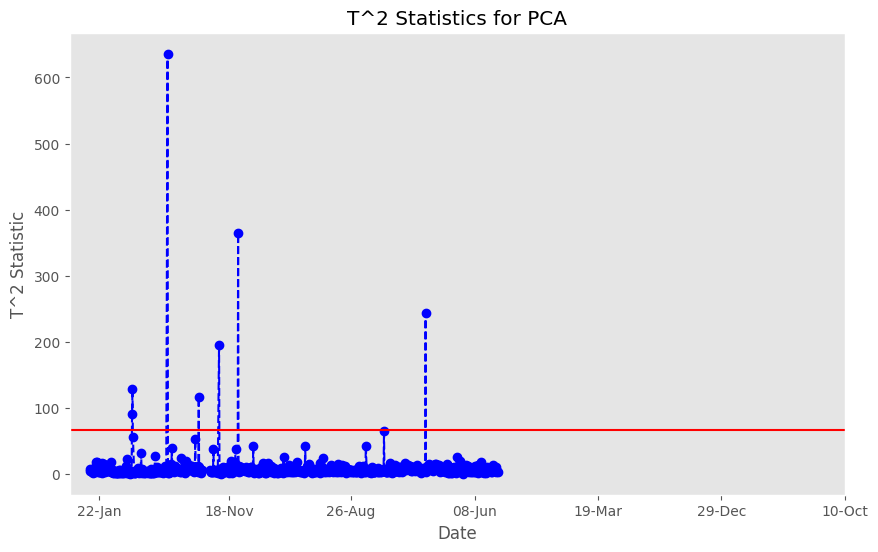

In [89]:
dates_truncated = dates[:len(df_T2)]

plt.figure(figsize=(10, 6))
plt.plot(dates_truncated, df_T2, marker='o', linestyle='--', color='b')
plt.axhline(y=T2_lim, color='r', linestyle='-')  # Add horizontal line at T^2 limit
plt.title('T^2 Statistics for PCA')
plt.xticks(date_samples,tick_labels)
plt.xlabel('Date')
plt.ylabel('T^2 Statistic')
plt.grid()
plt.show()

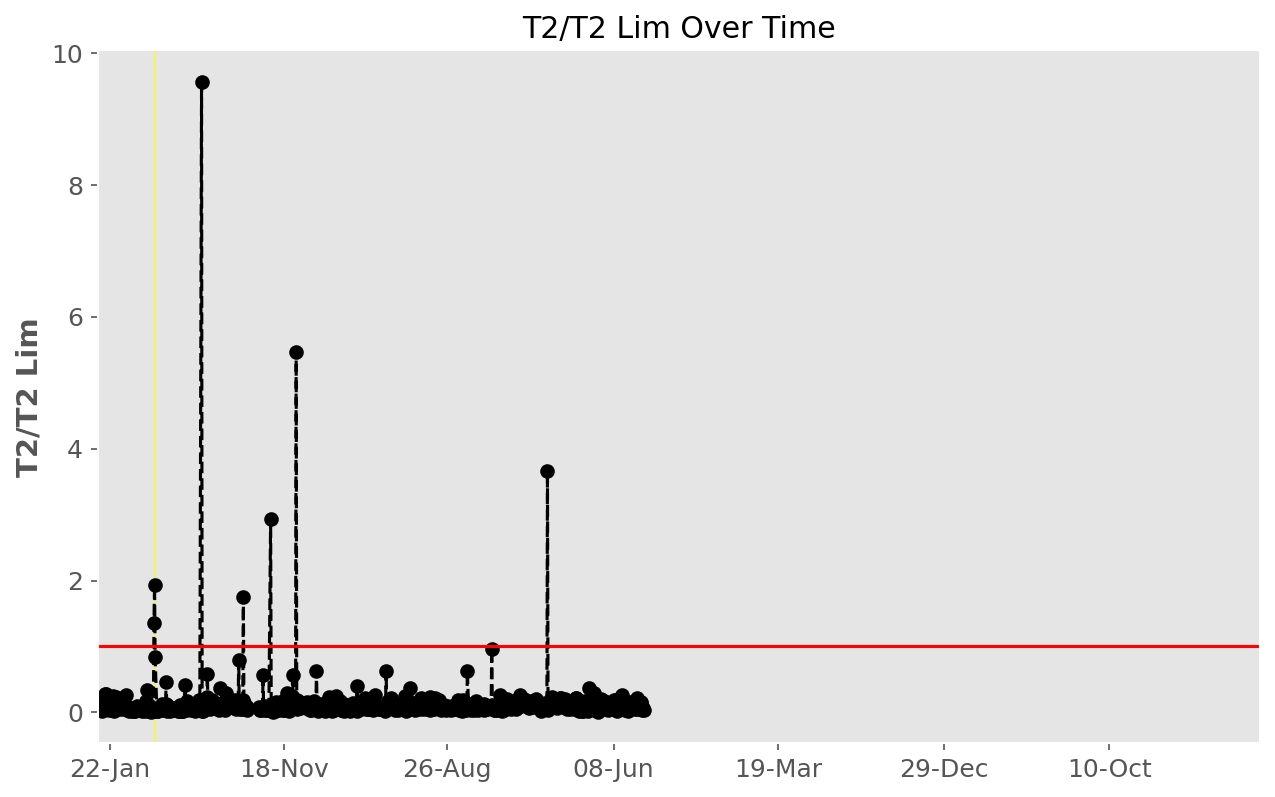

In [90]:
df_T2_ratio = pd.DataFrame({
    'T2/T2_lim': df_T2.iloc[:, 0] / T2_lim  # Ensure df_T2 is 1-dimensional
}, index=dates)

plt.figure(figsize=(10, 6), dpi=150)
plt.plot(df_T2_ratio.index, df_T2_ratio['T2/T2_lim'], color='black', marker='o', linestyle='--')
plt.hlines(1, xmin=df_T2_ratio.index[0], xmax=df_T2_ratio.index[-1], colors='red')

for start, end in outlier_periods_t2_mv:
    plt.axvspan(start, end, ymin=0, ymax=1, color='yellow', alpha=0.5)

plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('T2/T2 Lim', fontsize=14, fontweight='bold')
plt.xticks(date_samples,tick_labels)
plt.tick_params(labelsize=12)
plt.title('T2/T2 Lim Over Time')
plt.grid(False)
plt.show()

In [92]:
dates = pd.to_datetime(df_prep.index)
df_Q.index = df_prep.index[0:len(df_prep.index)-729] #adjust conforming to window size
outlier_periods_q_mv = []
in_period = False
start_date = None
count = 0

for i in range(len(df_Q)):
    if df_Q.iloc[i, 0] > Q_lim:
        if not in_period:
            start_date = dates[i]
            in_period = True
            count = 1
        else:
            count += 1
    else:
        if in_period:
            if count > 0:
                end_date = dates[i - 1]
                outlier_periods_q_mv.append((start_date, end_date))
            in_period = False

# Check if the last period extends to the end of the dataset and has more than 2 samples
if in_period and count > 0:
    end_date = dates[len(df_Q) - 1]
    outlier_periods_q_mv.append((start_date, end_date))

# Print the periods of high Q statistics
print("Quantity of abnormal periods:",len(outlier_periods_q_mv))
for start, end in outlier_periods_q_mv:
    print("Start date of high Q period:", start)
    print("End date of high Q period:", end)

Quantity of abnormal periods: 7
Start date of high Q period: 2014-10-26 00:00:00
End date of high Q period: 2014-10-26 00:00:00
Start date of high Q period: 2014-12-03 00:00:00
End date of high Q period: 2014-12-03 00:00:00
Start date of high Q period: 2015-01-13 00:00:00
End date of high Q period: 2015-01-13 00:00:00
Start date of high Q period: 2015-02-23 00:00:00
End date of high Q period: 2015-02-23 00:00:00
Start date of high Q period: 2015-04-07 00:00:00
End date of high Q period: 2015-04-07 00:00:00
Start date of high Q period: 2016-06-19 00:00:00
End date of high Q period: 2016-06-19 00:00:00
Start date of high Q period: 2016-07-07 00:00:00
End date of high Q period: 2016-07-07 00:00:00


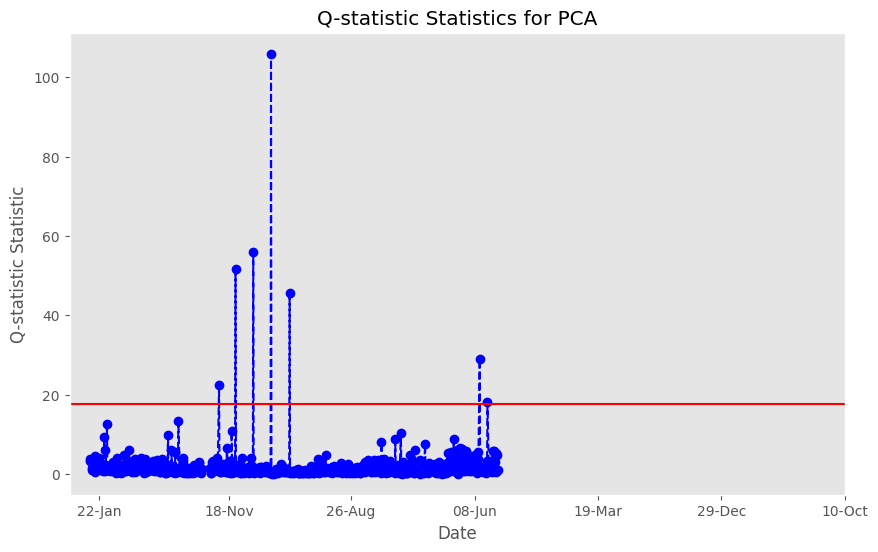

In [93]:
dates_truncated = dates[:len(df_Q)]

plt.figure(figsize=(10, 6))
plt.plot(dates_truncated, df_Q, marker='o', linestyle='--', color='b')
plt.axhline(y=Q_lim, color='r', linestyle='-')  # Add horizontal line at T^2 limit
plt.title('Q-statistic Statistics for PCA')
plt.xlabel('Date')
plt.xticks(date_samples,tick_labels)
plt.ylabel('Q-statistic Statistic')
plt.grid()
plt.show()

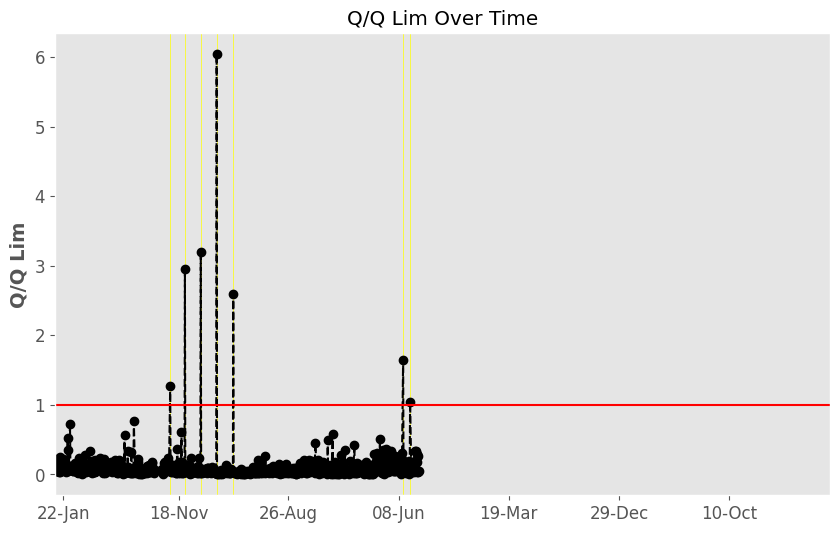

In [94]:
df_Q_ratio = pd.DataFrame({
    'Q/Q_lim': df_Q.iloc[:, 0] / Q_lim  # Ensure df_Q is 1-dimensional
}, index=dates)

plt.figure(figsize=(10, 6))
plt.plot(df_Q_ratio.index, df_Q_ratio['Q/Q_lim'], color='black', marker='o', linestyle='--')
plt.hlines(1, xmin=df_Q_ratio.index[0], xmax=df_Q_ratio.index[-1], colors='red')

for start, end in outlier_periods_q_mv:
    plt.axvspan(start, end, ymin=0, ymax=1, color='yellow', alpha=1.0)

plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Q/Q Lim', fontsize=14, fontweight='bold')
plt.xticks(date_samples,tick_labels)
plt.tick_params(labelsize=12)
plt.title('Q/Q Lim Over Time')
plt.grid()
plt.show()

# Feature Selection

## Random Forest

In [95]:
df_Y = y.copy()

In [96]:
df_prep.head()

avg_outflow  avg_inflow  total_grid    Am    BOD      TN     T  \
date                                                                         
2014-01-01        2.941       2.589      175856  27.0  365.0  60.378  19.3   
2014-01-02        2.936       2.961      181624  25.0  370.0  60.026  17.1   
2014-01-05        2.928       3.225      202016  42.0  418.0  64.522  16.8   
2014-01-06        2.928       3.354      207547  36.0  430.0  63.000  14.6   
2014-01-07        2.917       3.794      202824  46.0  508.0  65.590  13.4   

              TM    Tm  SLP   H    PP    VV     V    VM    VG  
date                                                           
2014-01-01  25.1  12.6  0.0  56  1.52  10.0  26.9  53.5  79.5  
2014-01-02  23.6  12.3  0.0  63  0.00  10.0  14.4  27.8   0.0  
2014-01-05  27.2   8.8  0.0  47  0.25  10.0  31.9  61.1  77.8  
2014-01-06  19.9  11.1  0.0  49  0.00  10.0  27.0  38.9  53.5  
2014-01-07  19.1   8.0  0.0  65  0.00  10.0  20.6  35.2  53.5

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df_prep, df_Y, test_size=0.2, shuffle=False)

In [98]:
clf = RandomForestRegressor(random_state=42)
clf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

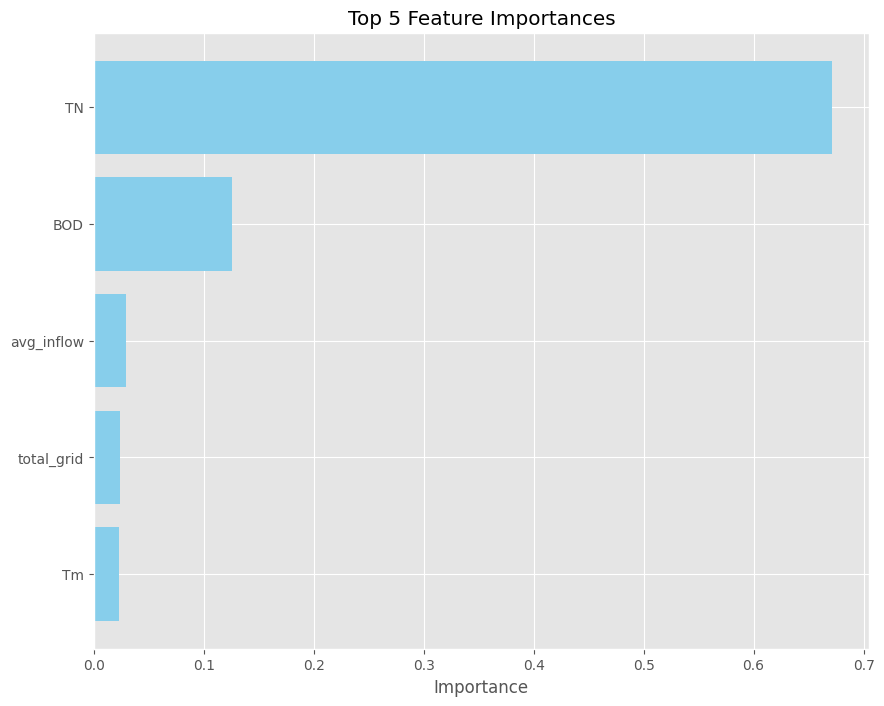

In [100]:
features = X_train.columns.tolist()
f_i = list(zip(features, clf.feature_importances_))
f_i.sort(key=lambda x: x[1], reverse=True)

# Select the top 5 features
top_5_features = f_i[:5]

features, importances = zip(*top_5_features)
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Top 5 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [101]:
top_5_features

[('TN', 0.6712347068696553),
 ('BOD', 0.12605738353614537),
 ('avg_inflow', 0.028909459838012398),
 ('total_grid', 0.023891679930894173),
 ('Tm', 0.023027159476136157)]

## MRMR Selection

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1382 entries, 2014-01-01 to 2019-06-27
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   avg_outflow  1382 non-null   float64
 1   avg_inflow   1382 non-null   float64
 2   total_grid   1382 non-null   int64  
 3   Am           1382 non-null   float64
 4   BOD          1382 non-null   float64
 5   COD          1382 non-null   float64
 6   TN           1382 non-null   float64
 7   T            1382 non-null   float64
 8   TM           1382 non-null   float64
 9   Tm           1382 non-null   float64
 10  SLP          1382 non-null   float64
 11  H            1382 non-null   int64  
 12  PP           1382 non-null   float64
 13  VV           1382 non-null   float64
 14  V            1382 non-null   float64
 15  VM           1382 non-null   float64
 16  VG           1382 non-null   float64
dtypes: float64(15), int64(2)
memory usage: 226.6 KB


In [106]:
best_rmse = float('inf')
best_k = 2

# Define a range of K values to test from 11 to 200 - chosen arbitrarily
k_values = range(2,15)
rmse_values = []

for K in k_values:
     selected_features = mrmr_regression(X=X_train, y=y_train, K=K)
     df_train = X_train[selected_features]
     df_test = X_test[selected_features]

     lin_reg = LinearRegression()
     lin_reg.fit(df_train, y_train)
     Y_pred = lin_reg.predict(df_test)

     rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
     rmse_values.append(rmse)

     if rmse < best_rmse:
         best_rmse = rmse
         best_k = K

print(f'\n Best K: {best_k}')
print(f'Best RMSE: {best_rmse:.3f}')

100%|██████████| 14/14 [00:02<00:00,  6.36it/s]


 Best K: 13
Best RMSE: 113.571


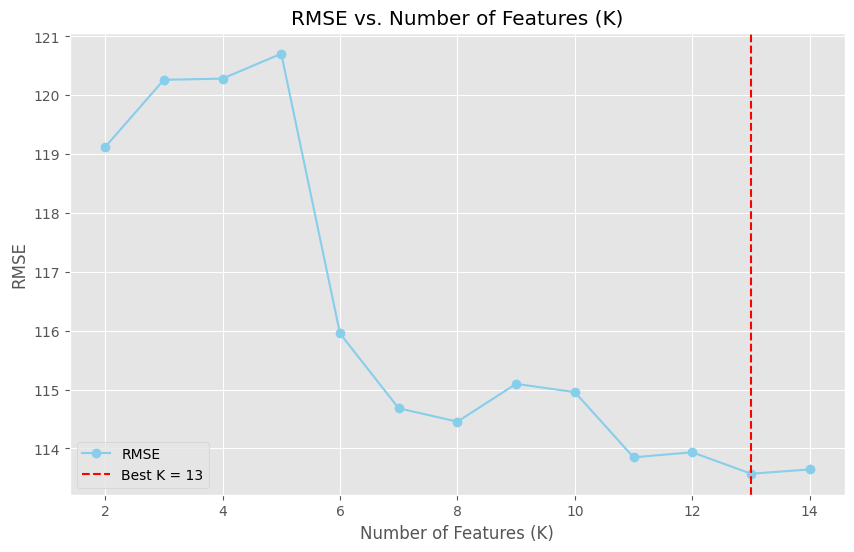

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='skyblue', label='RMSE')
plt.axvline(best_k, color='r', linestyle='--', label=f'Best K = {best_k}')
plt.xlabel('Number of Features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Features (K)')
plt.legend()
plt.grid(True)
plt.show()

In [108]:
selected_features = mrmr_regression(X=X_train, y=y_train, K=best_k)

100%|██████████| 13/13 [00:02<00:00,  5.67it/s]


In [109]:
selected_features

['TN',
 'BOD',
 'Am',
 'H',
 'VV',
 'TM',
 'T',
 'PP',
 'Tm',
 'V',
 'avg_inflow',
 'SLP',
 'VG']

In [110]:
sel_feat = ['TN',
 'BOD',
 'Am',
 'H',
 'VV',
 'TM',
 'T',
 'PP',
 'Tm',
 'V',
 'avg_inflow',
 'SLP',
 'VG']